# Project: TMDb movie dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data is about TMDb. It contains the information such as revenues, genres, casts about over 10,000 movies.

> Questions
>
> 1. Which genre was made the most from year to year ?
>
> 2. Which month was the movie released the most?
>
> 3. What were the feautres that the movie with high net profit had?
>
> 4. What were the feature that popular movies had?
>
> 5. Which actor participated in the movie the most?



In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data
df = pd.read_csv('./tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# check datatype
# df.info()

# Null value check
# 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords'... have Nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (Replace this with more specific notes!)

#### Handling 'nan', 'duplicated', 'outliers'

In [5]:
# Fill 'Nan' value in [ cast, genres, production_companies, director ] as '0'
df = df.fillna('0')

# Check duplicate rows
# there is 1 duplicate row
df.duplicated().sum()

# Delete duplicate row
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   imdb_id               3854 non-null   object 
 2   popularity            3854 non-null   float64
 3   budget                3854 non-null   int64  
 4   revenue               3854 non-null   int64  
 5   original_title        3854 non-null   object 
 6   cast                  3854 non-null   object 
 7   homepage              3854 non-null   object 
 8   director              3854 non-null   object 
 9   tagline               3854 non-null   object 
 10  keywords              3854 non-null   object 
 11  overview              3854 non-null   object 
 12  runtime               3854 non-null   int64  
 13  genres                3854 non-null   object 
 14  production_companies  3854 non-null   object 
 15  release_date        

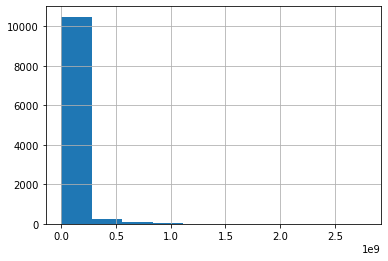

In [6]:
# Revenue has so many '0' values, which is not a good sign and have to be dealt with.
# I decided to delete budget and revenue columns and instead created 'df2' which only contains the data with normal values of 'budget' and 'revenue'
df['revenue'].hist()
df_revenue_budget = df[ (df['revenue'] != 0) & (df['budget'] != 0) ]
df_revenue_budget.info()

#### Create 'net_profit', 'release_month'

In [7]:
# create 'net_profit' column
# net_profit = revenue - budget
df['net_profit'] = df['revenue'] - df['budget']

In [8]:
# create 'release_month' column
def getMonth(df):
    return df['release_date'].apply(lambda x: x.split('/')[0])
df['release_month'] = getMonth(df)

#### Drop unnecessary columns

In [9]:
# drop the columns not necessary for anaylsis
# drop list = 'id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'
df.drop(['imdb_id','homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj', 'budget', 'revenue'], axis=1, inplace=True)

> Questions
>
> 1. Which genre was made the most from year to year ?
>
> 2. Which month was the movie released the most?
>
> 3. What were the feautres that the movie with high net profit had?
>
> 4. What were the feature that popular movies had?
>
> 5. Which actor participated in the movie the most?


<a id='eda'></a>
## Exploratory Data Analysis
### Q 1) Which  genre was released the most from year to year ?

In [10]:
# store the number of genres released in specific year in 'genre_year' dict
genre_year = dict()

for i in range(len(df)):
    year = df.iloc[i]['release_year']
    genre = df.iloc[i]['genres']
    if year not in genre_year:
        genre_year[year] = {}
        for j in genre.split('|'):
            if j not in genre_year[year]:
                genre_year[year][j] = 1
            else:
                genre_year[year][j] += 1
    else:
        for j in genre.split('|'):
            if j not in genre_year[year]:
                genre_year[year][j] = 1
            else:
                genre_year[year][j] += 1


C:\Users\jin03\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


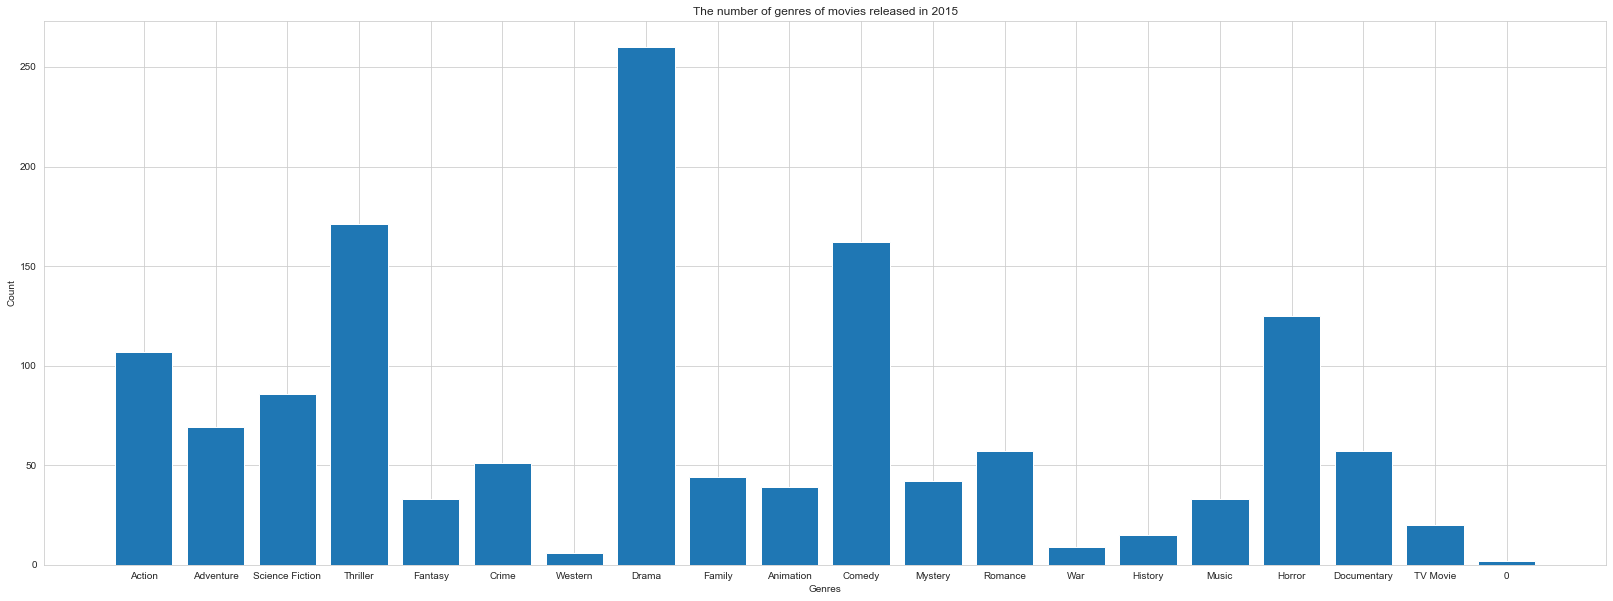

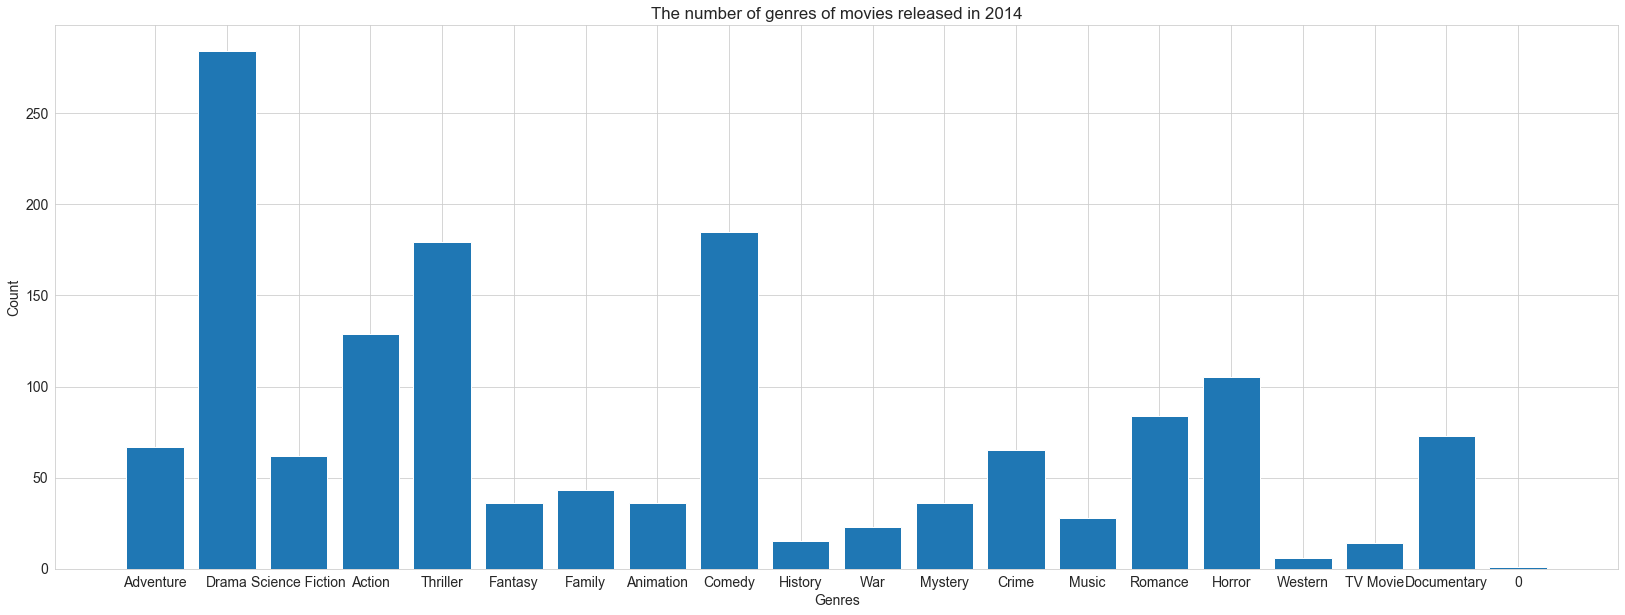

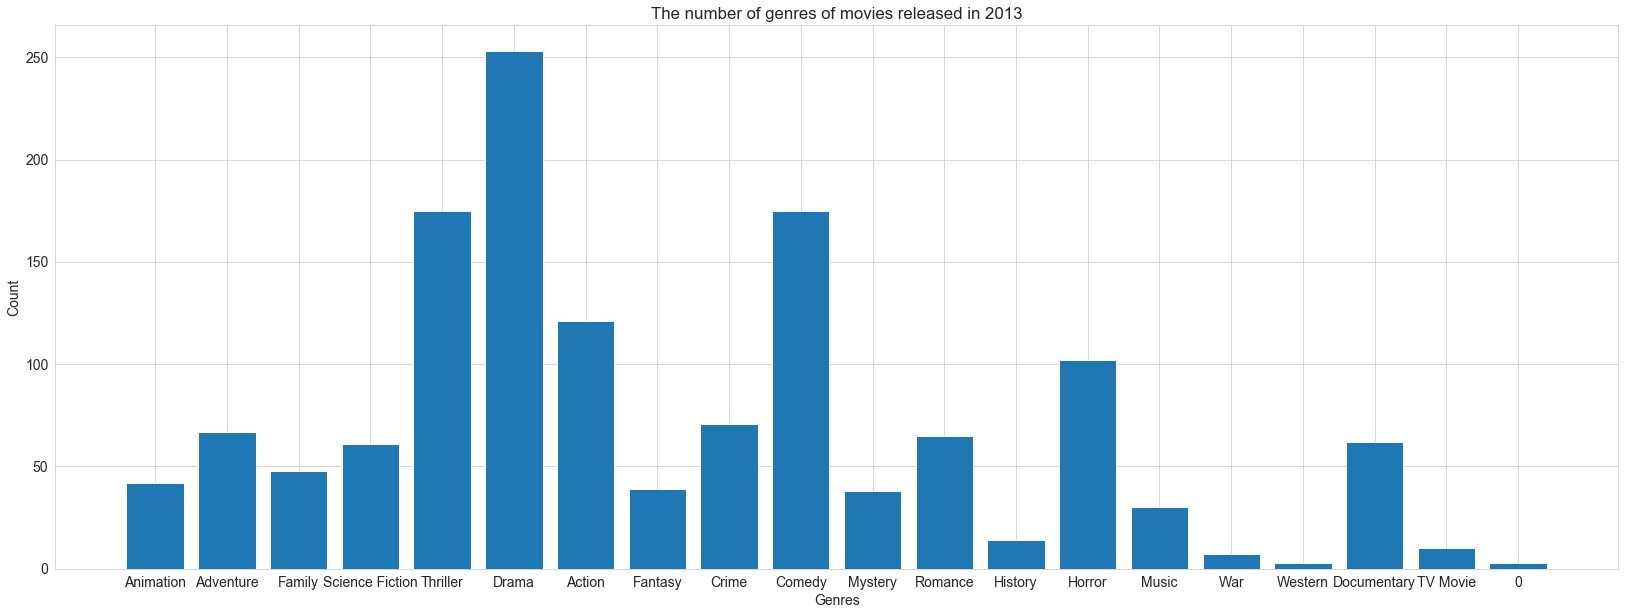

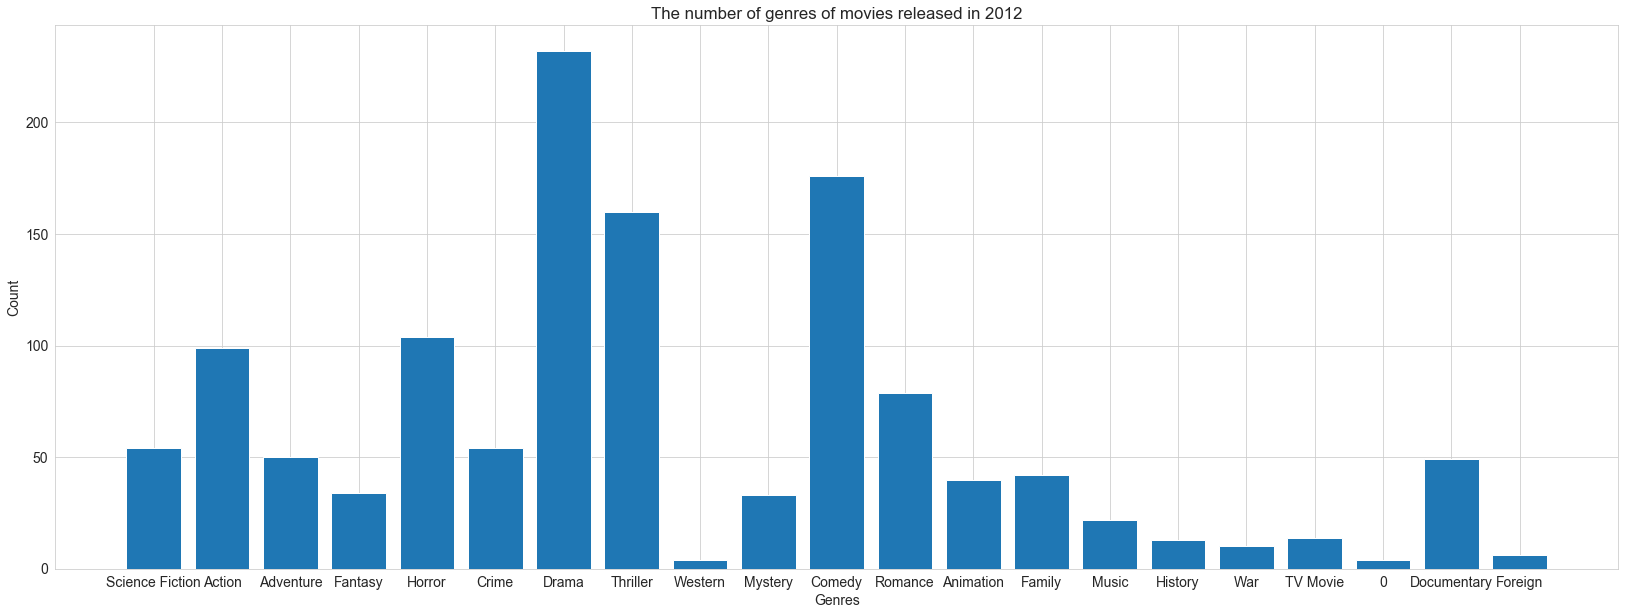

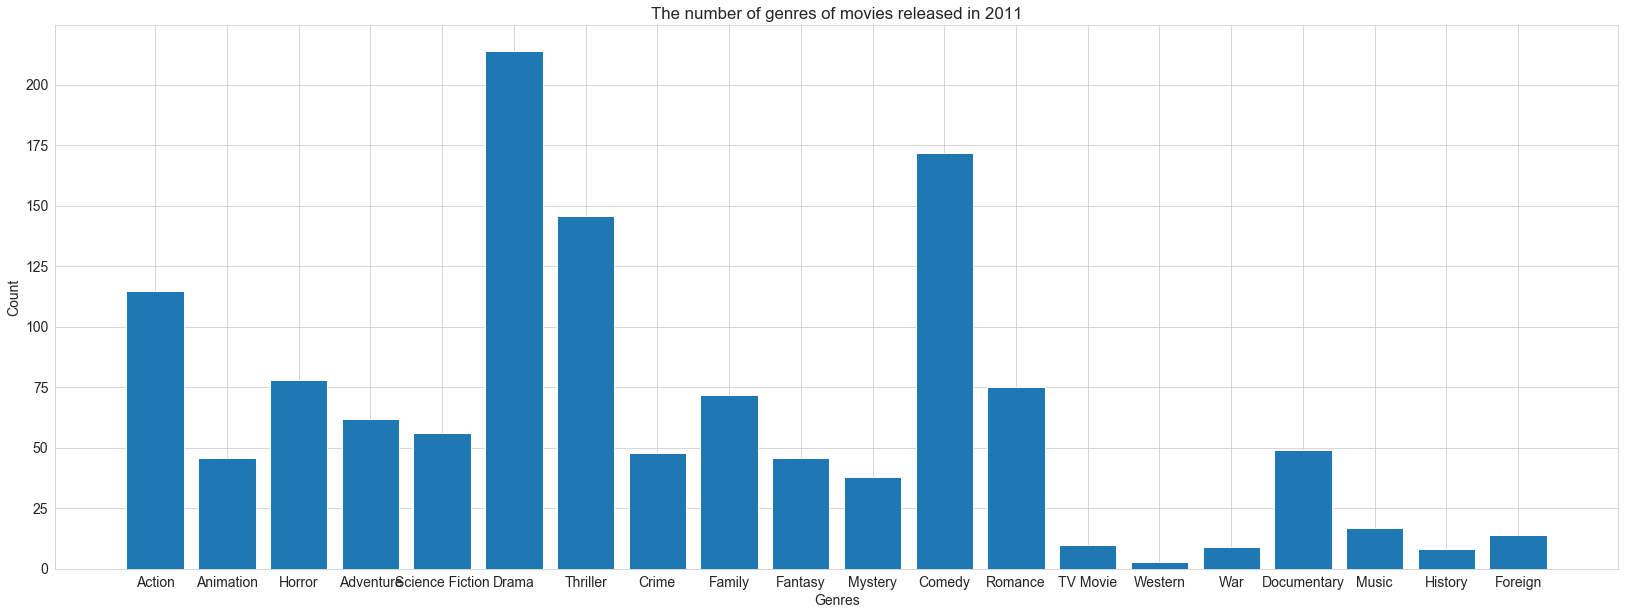

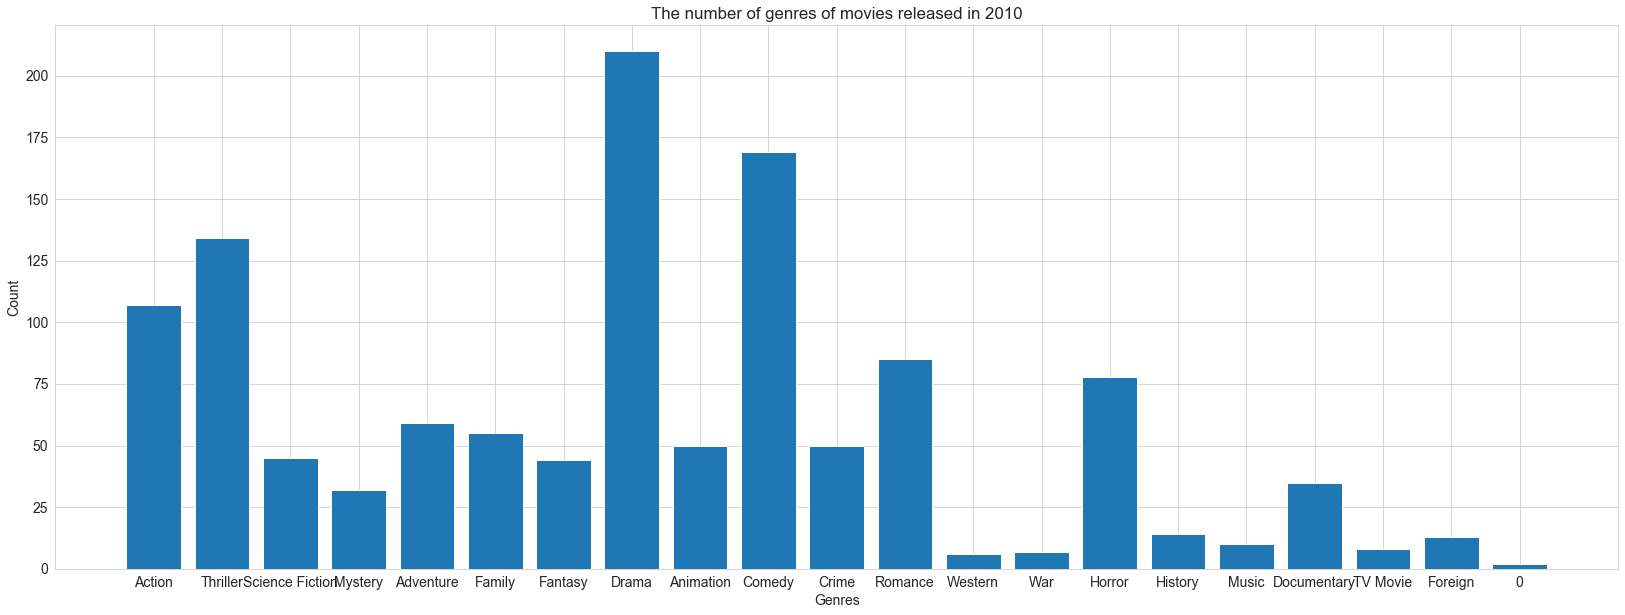

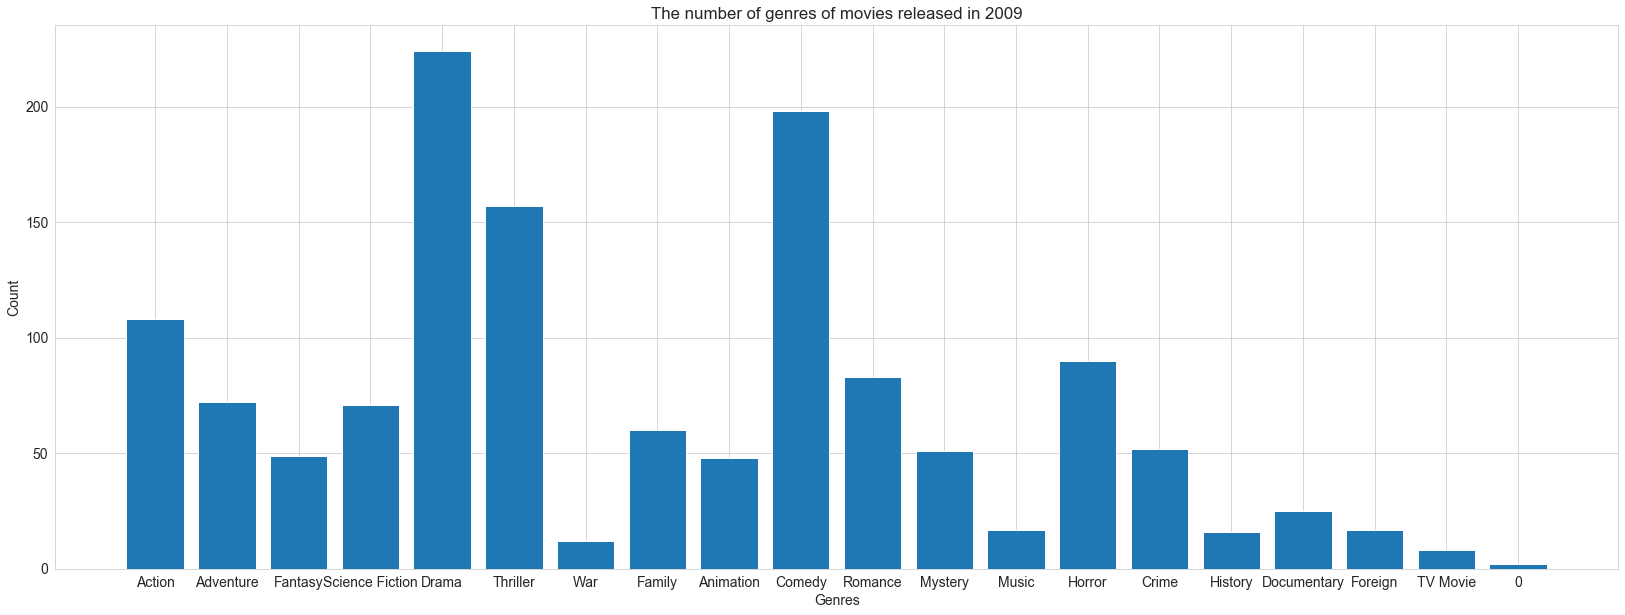

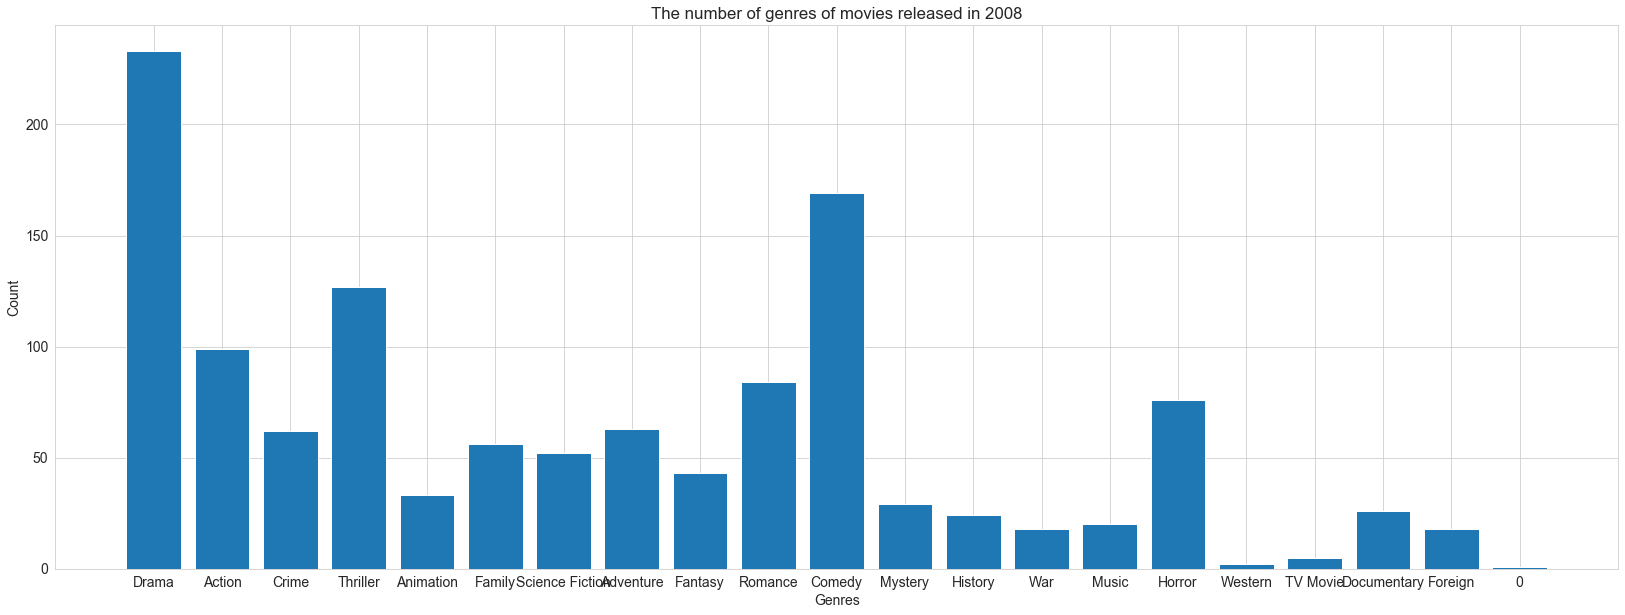

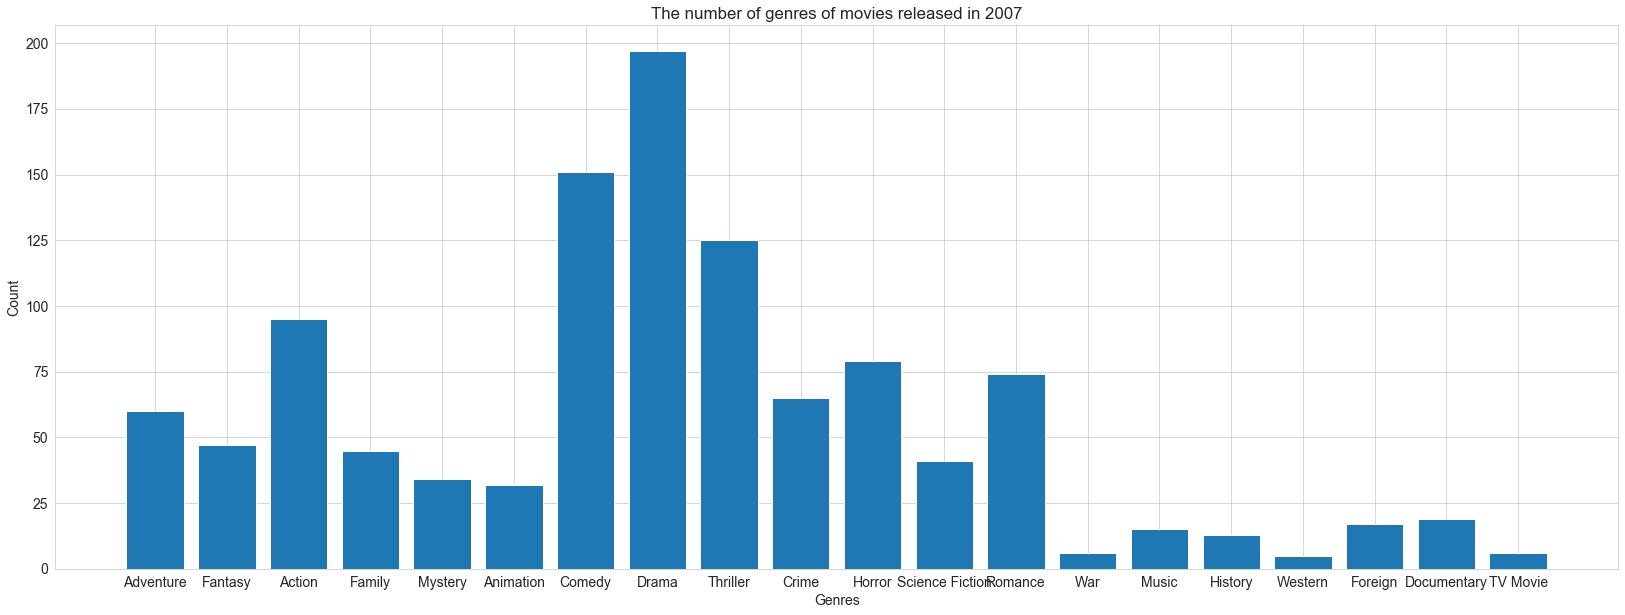

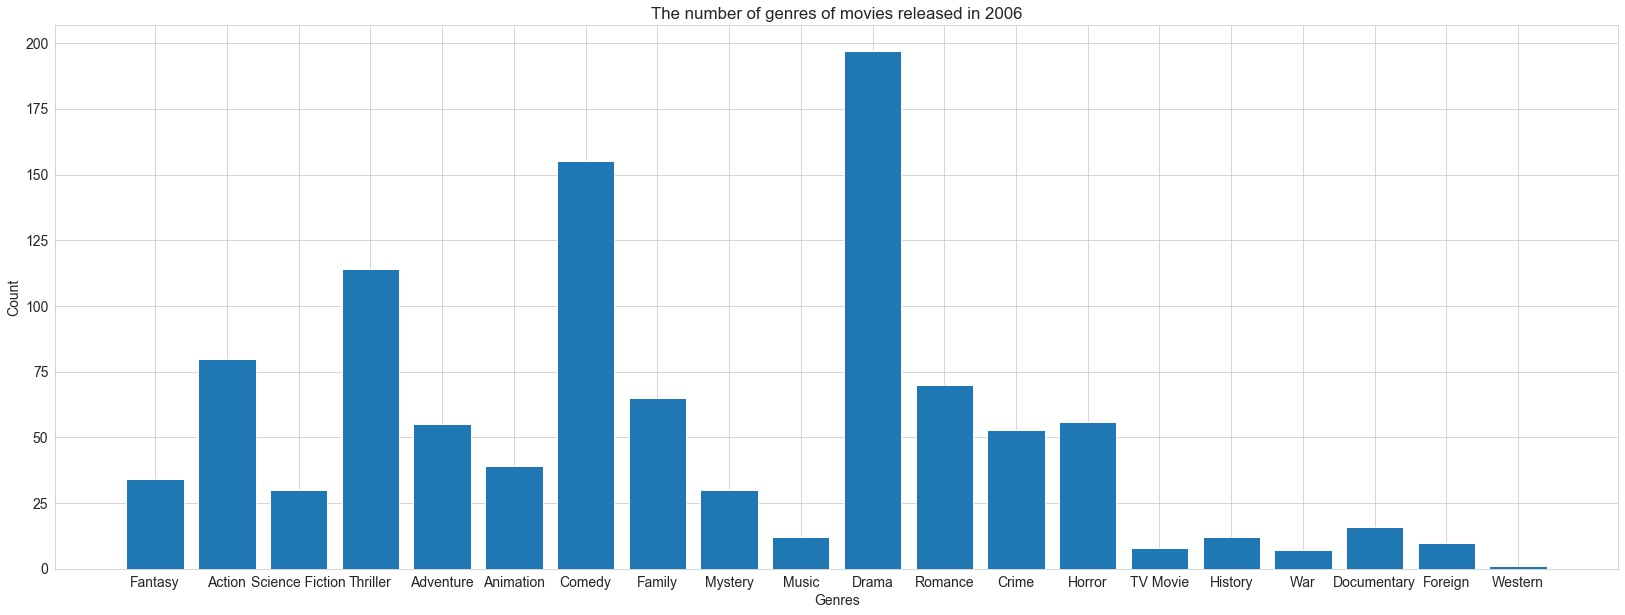

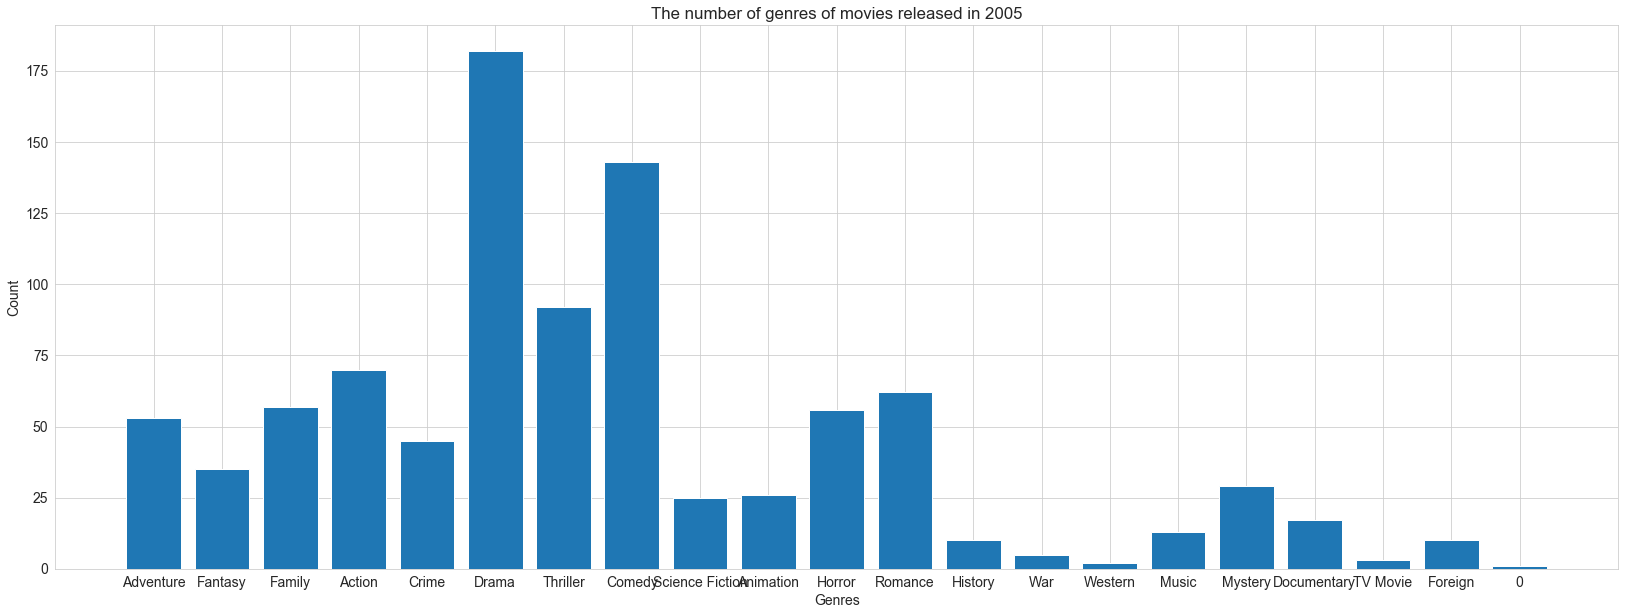

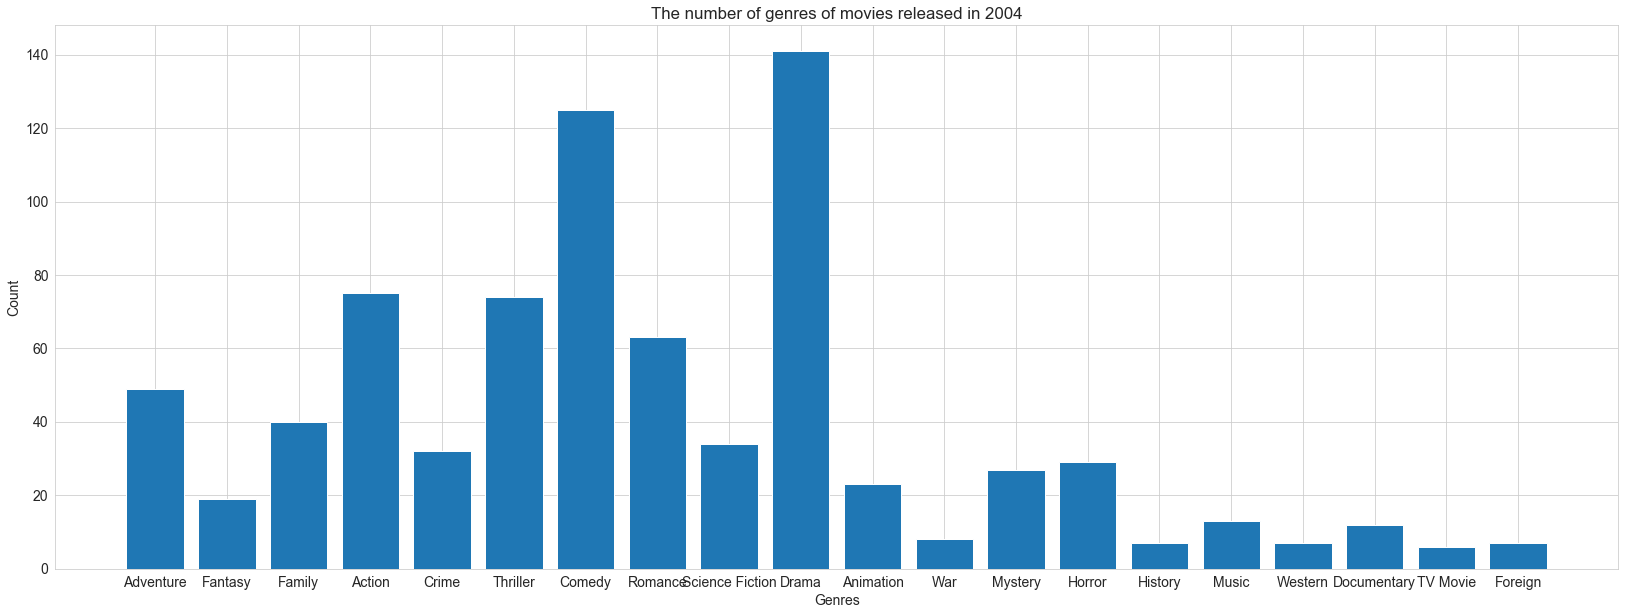

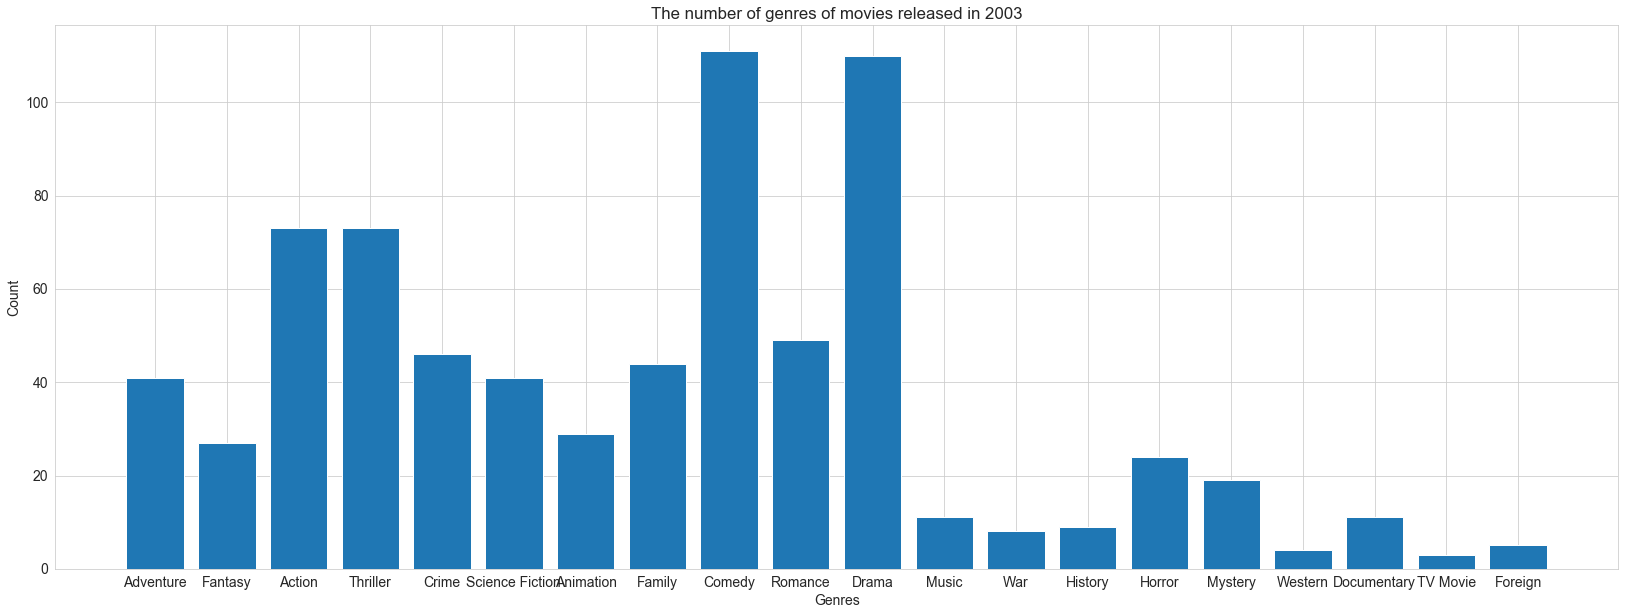

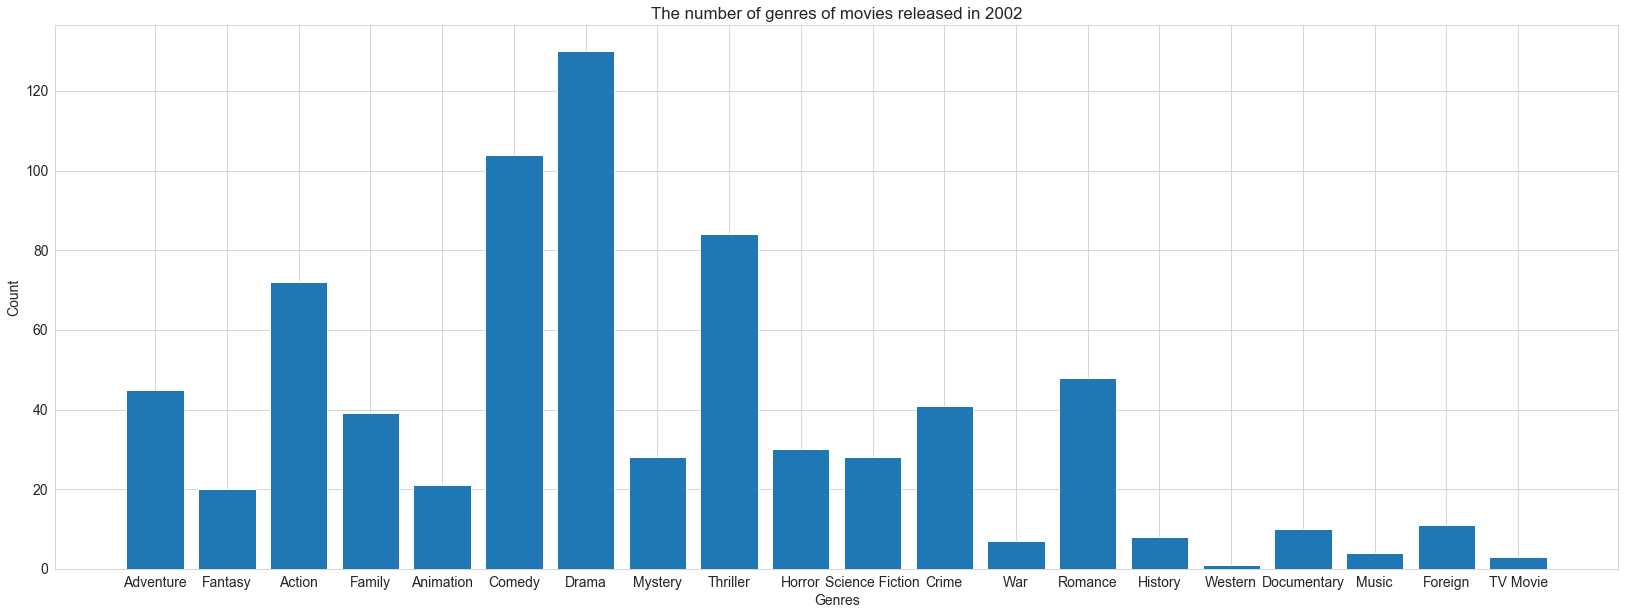

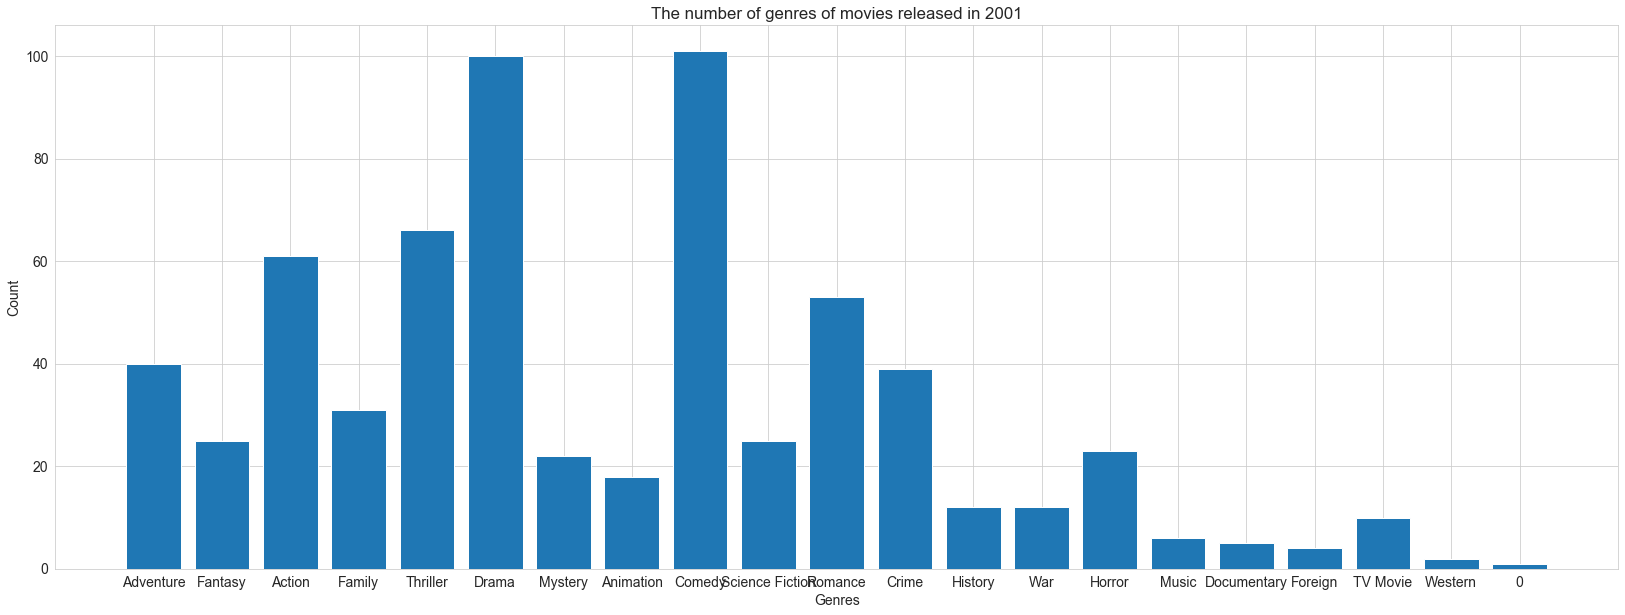

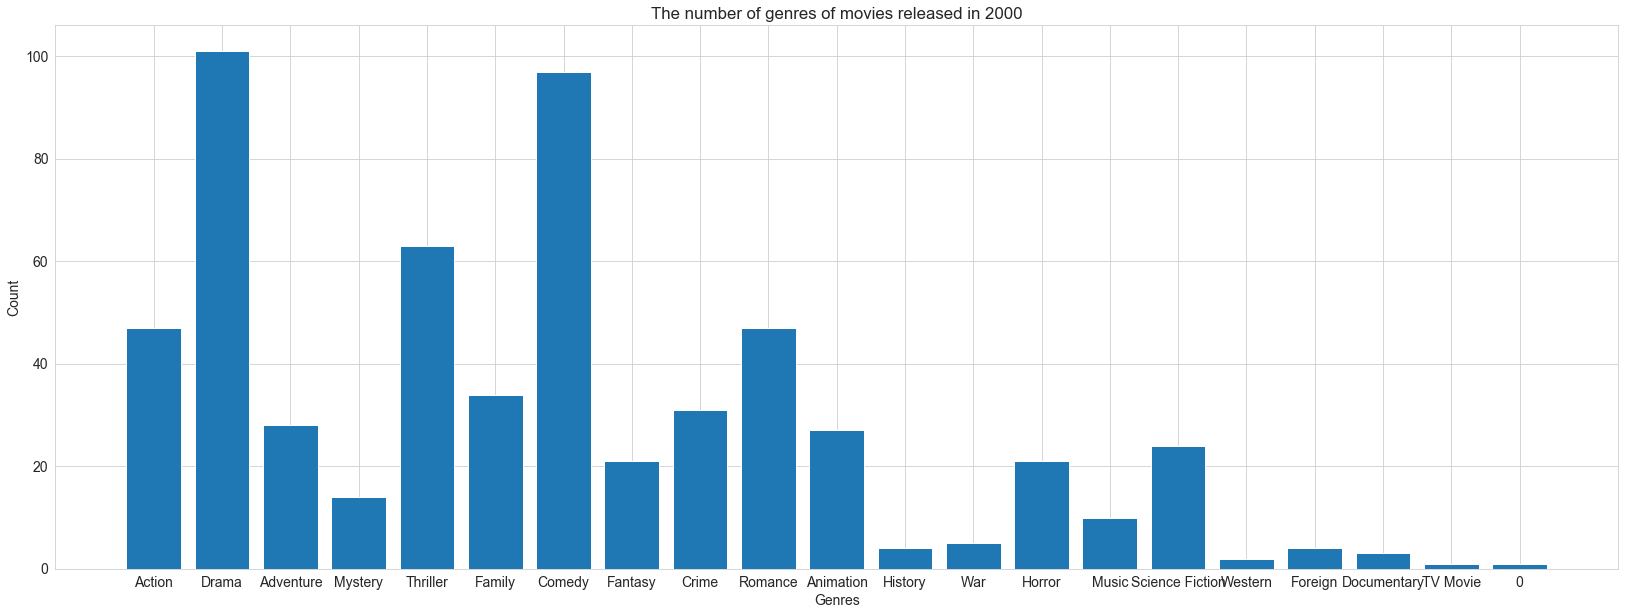

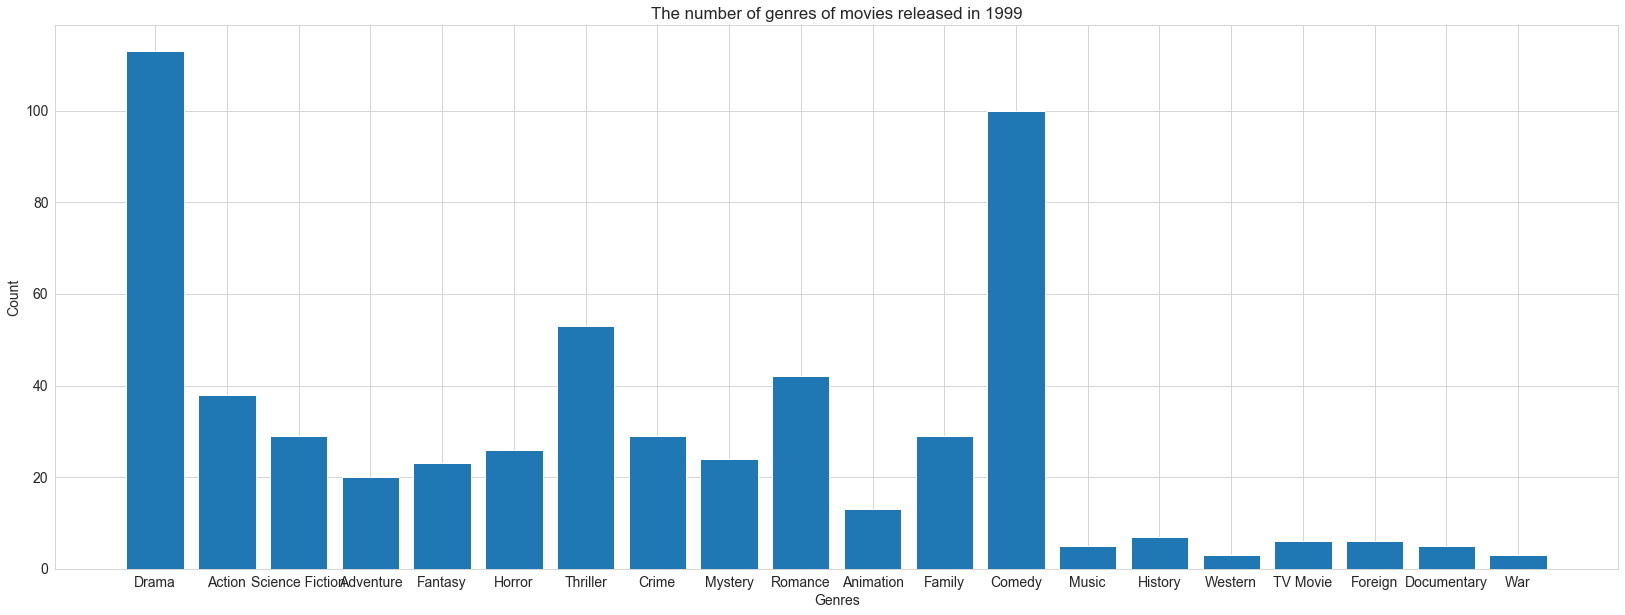

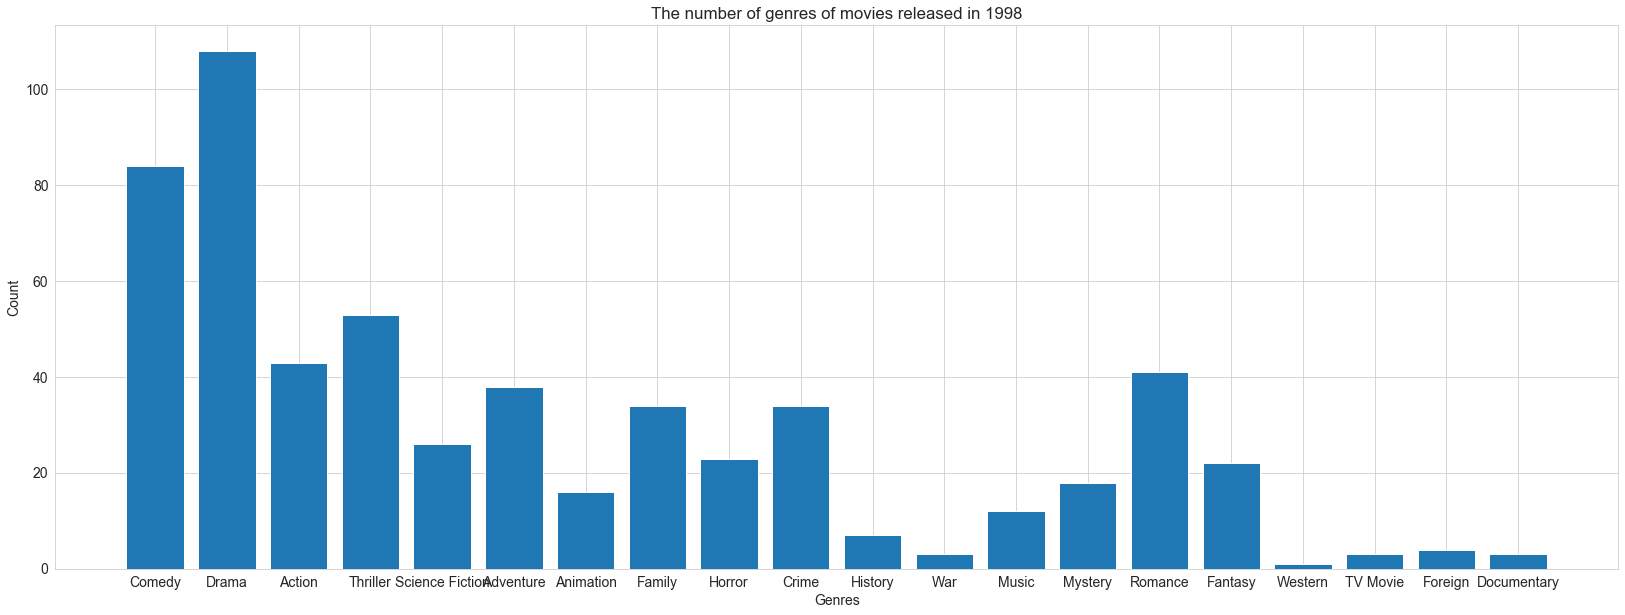

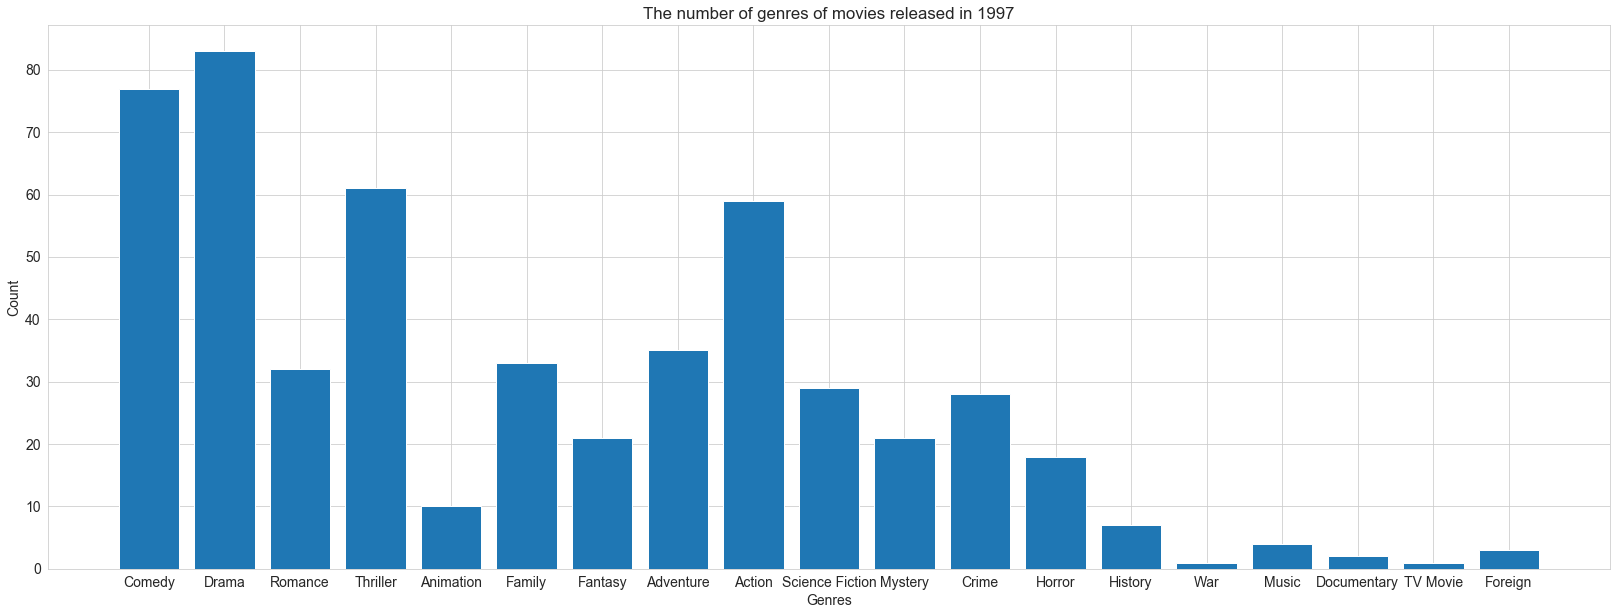

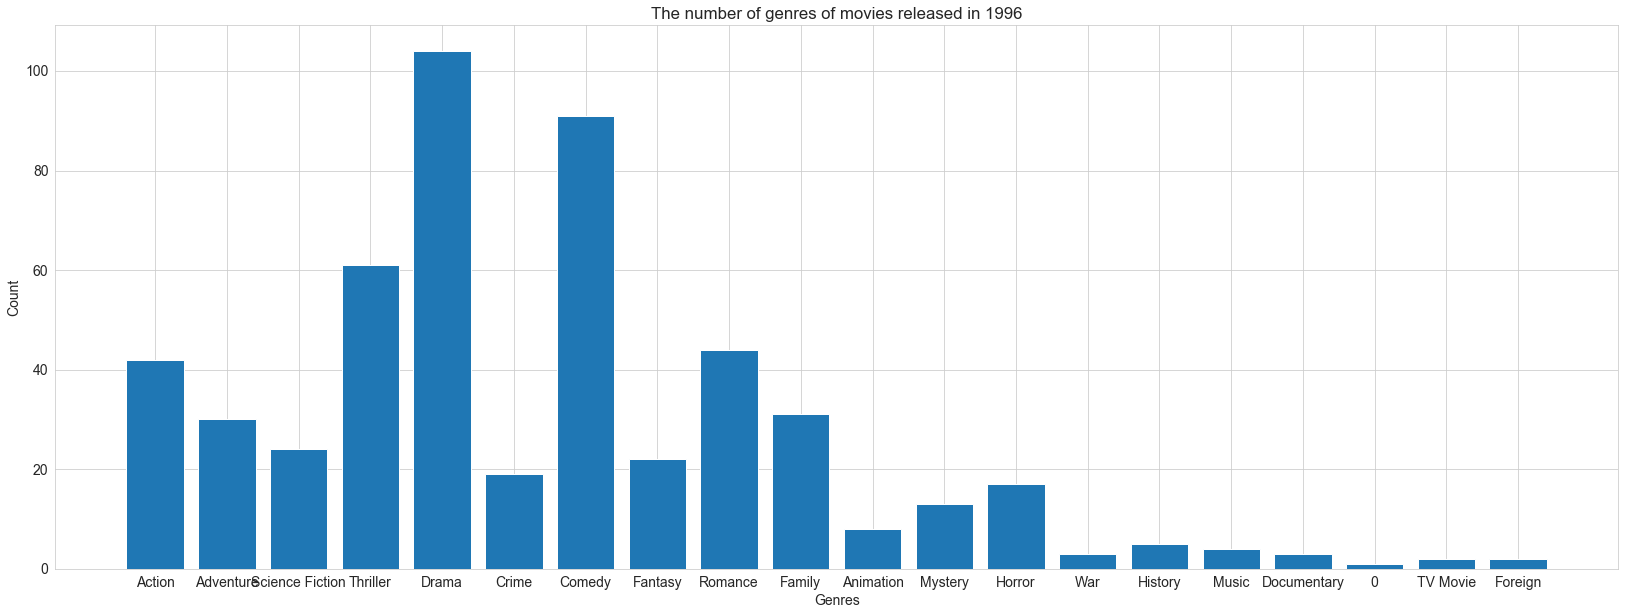

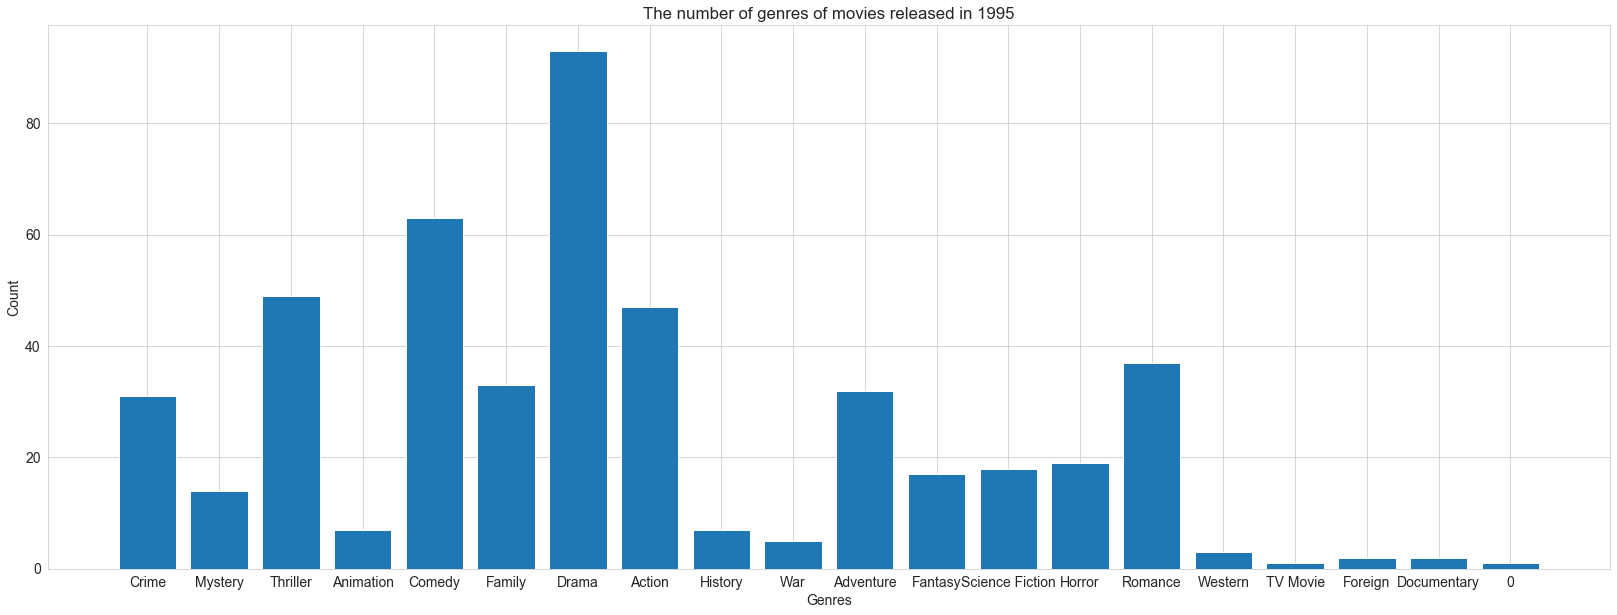

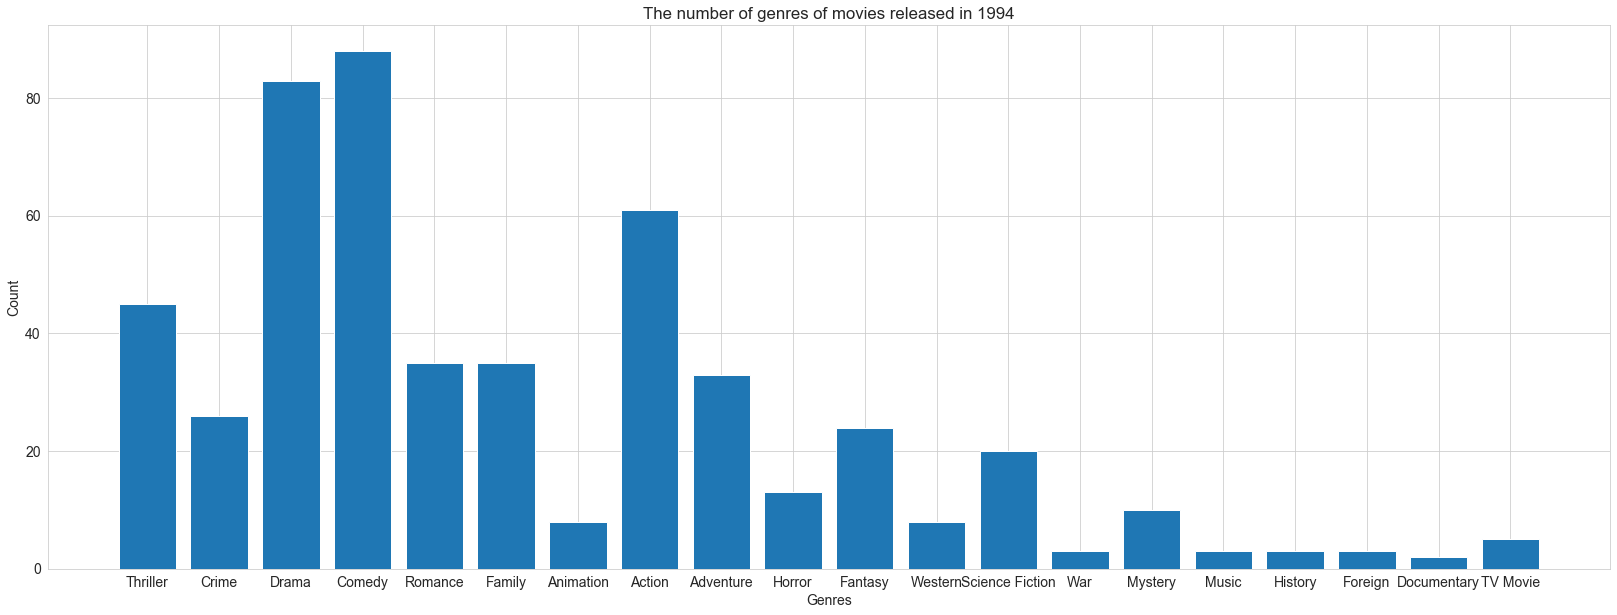

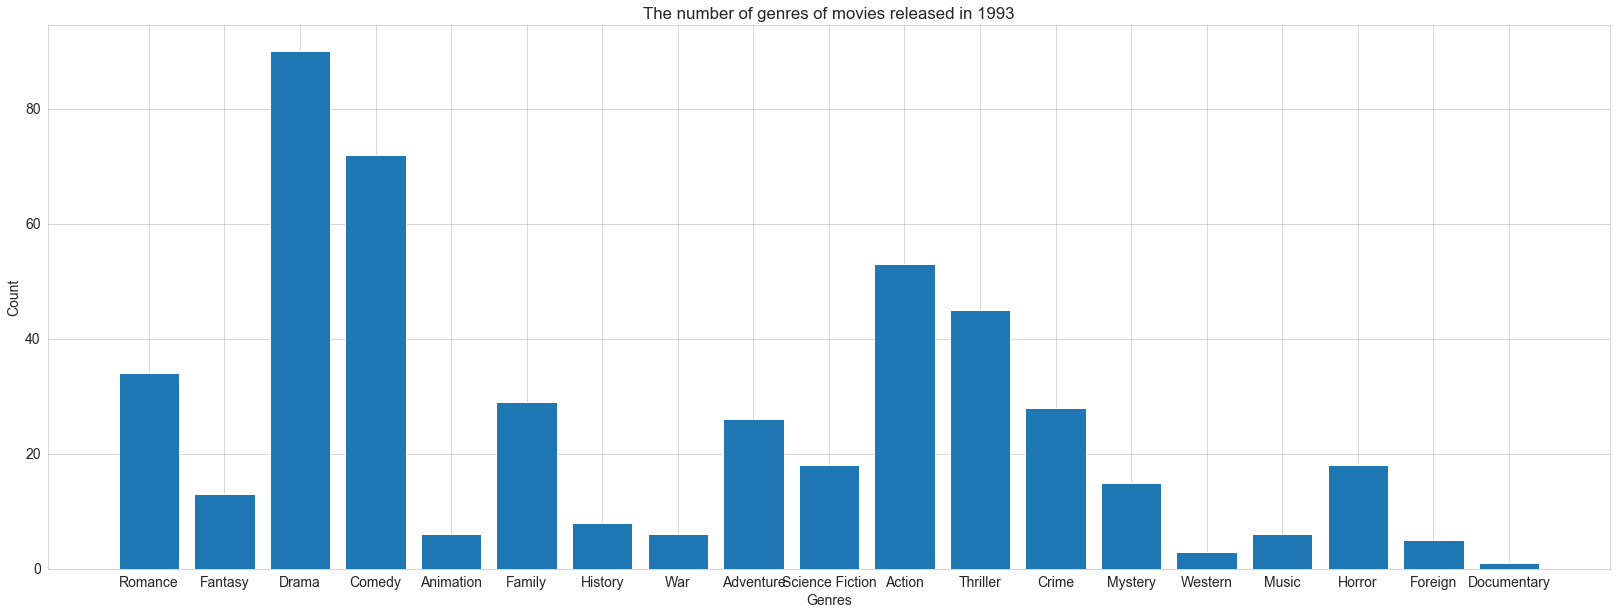

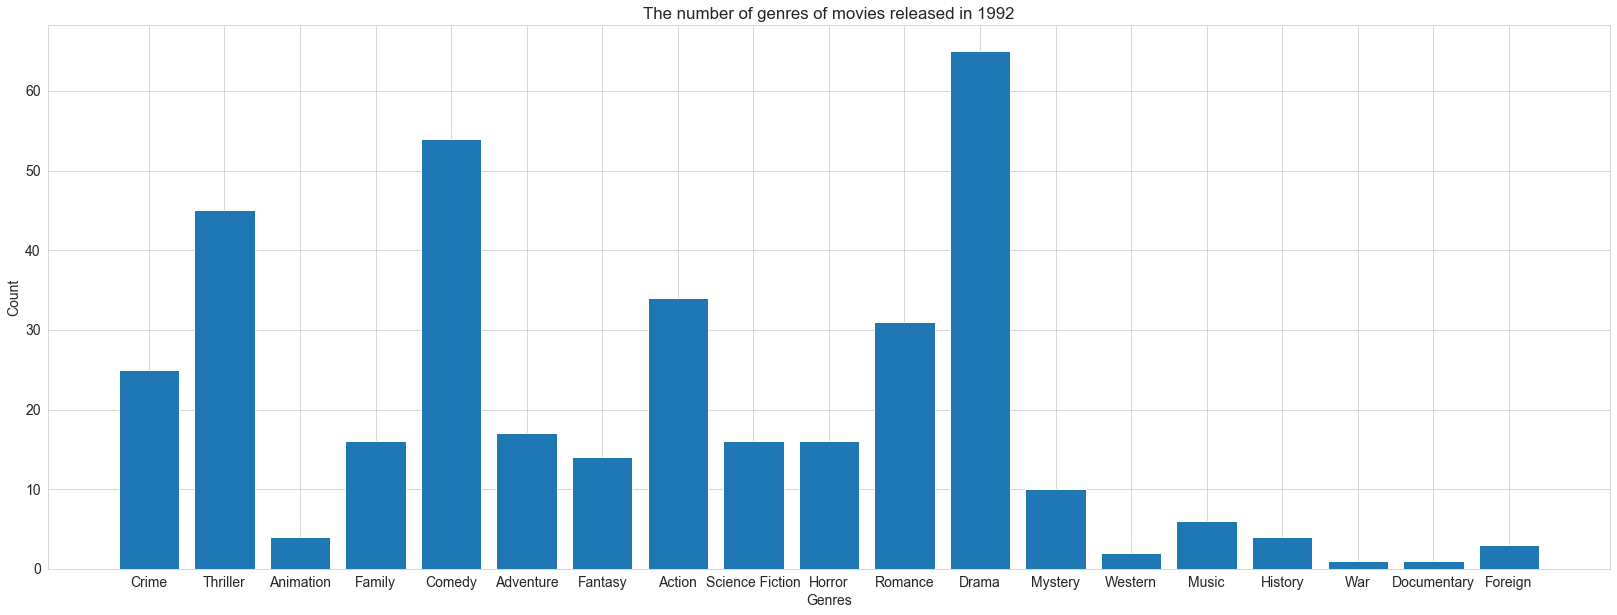

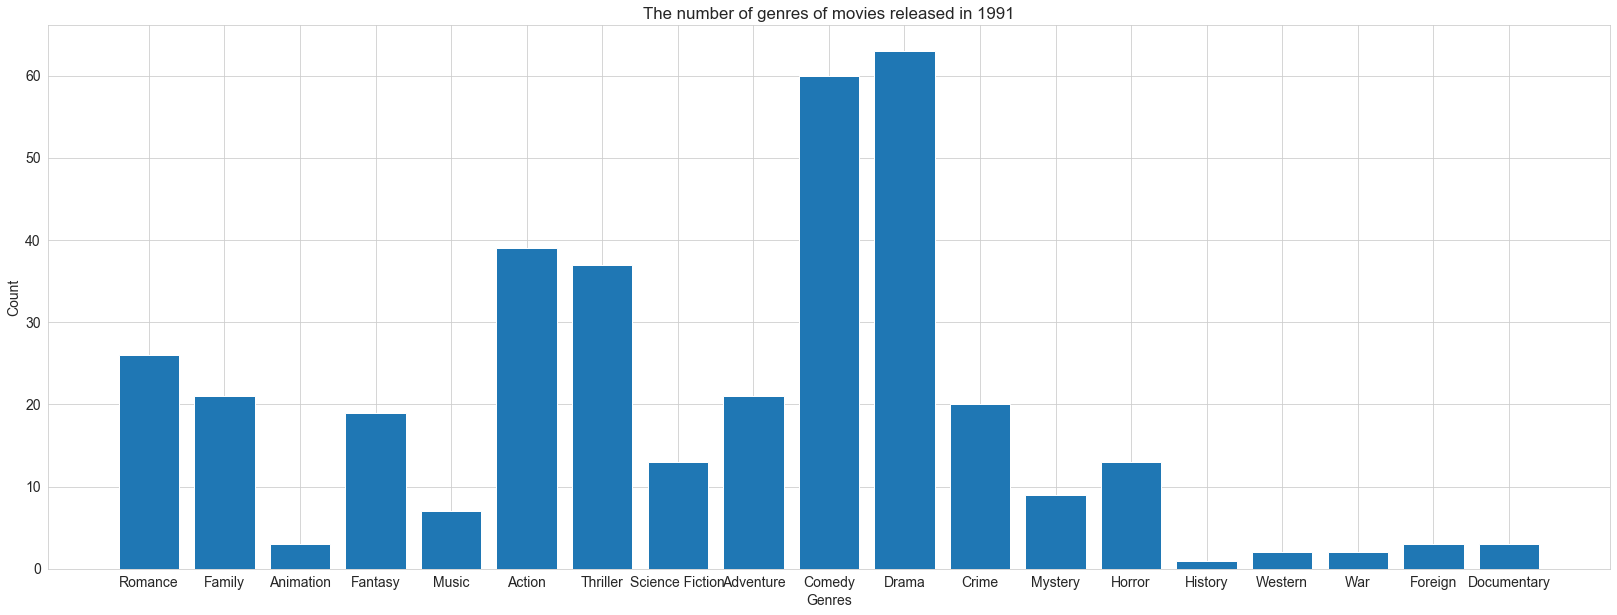

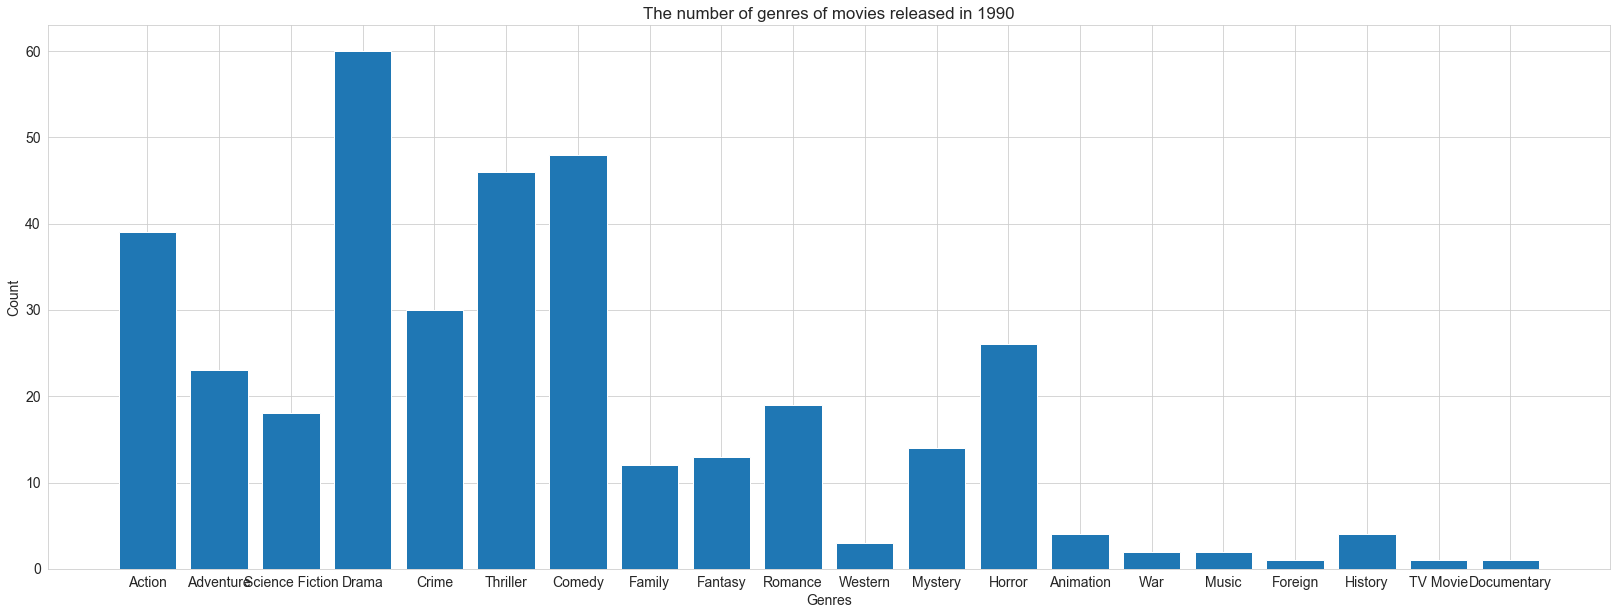

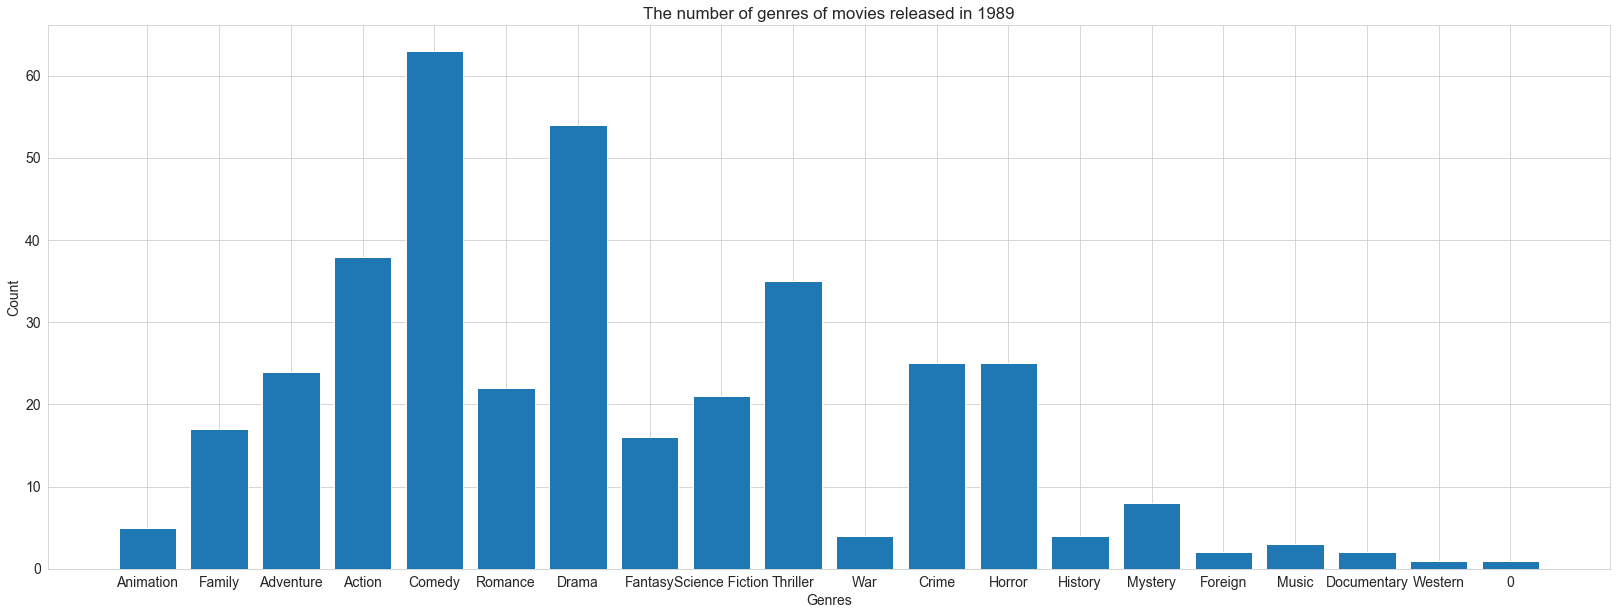

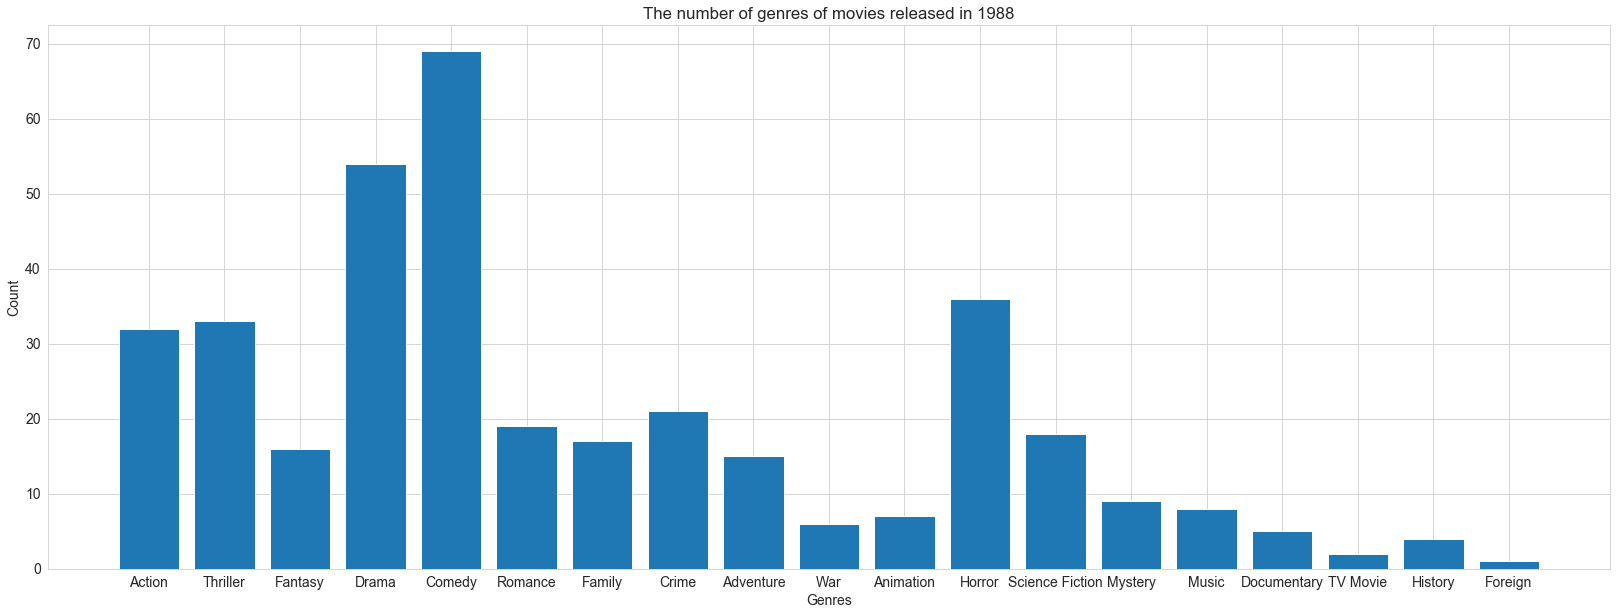

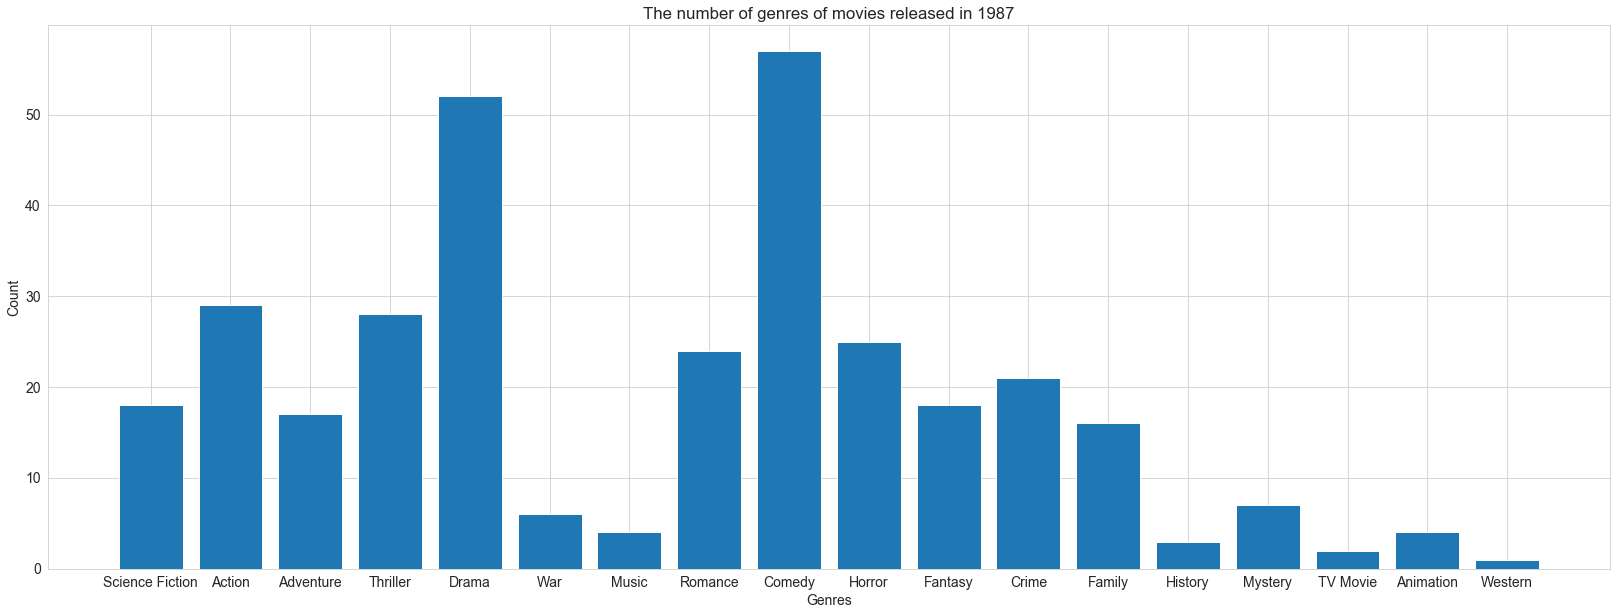

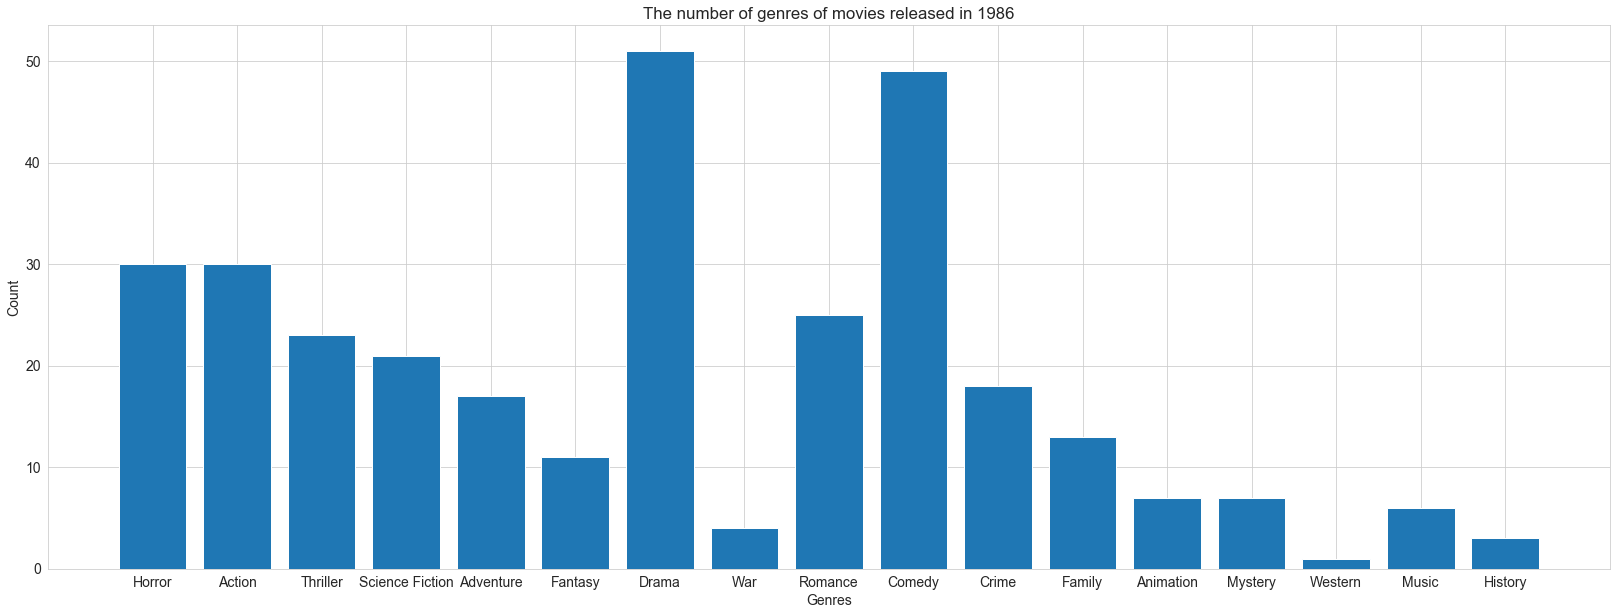

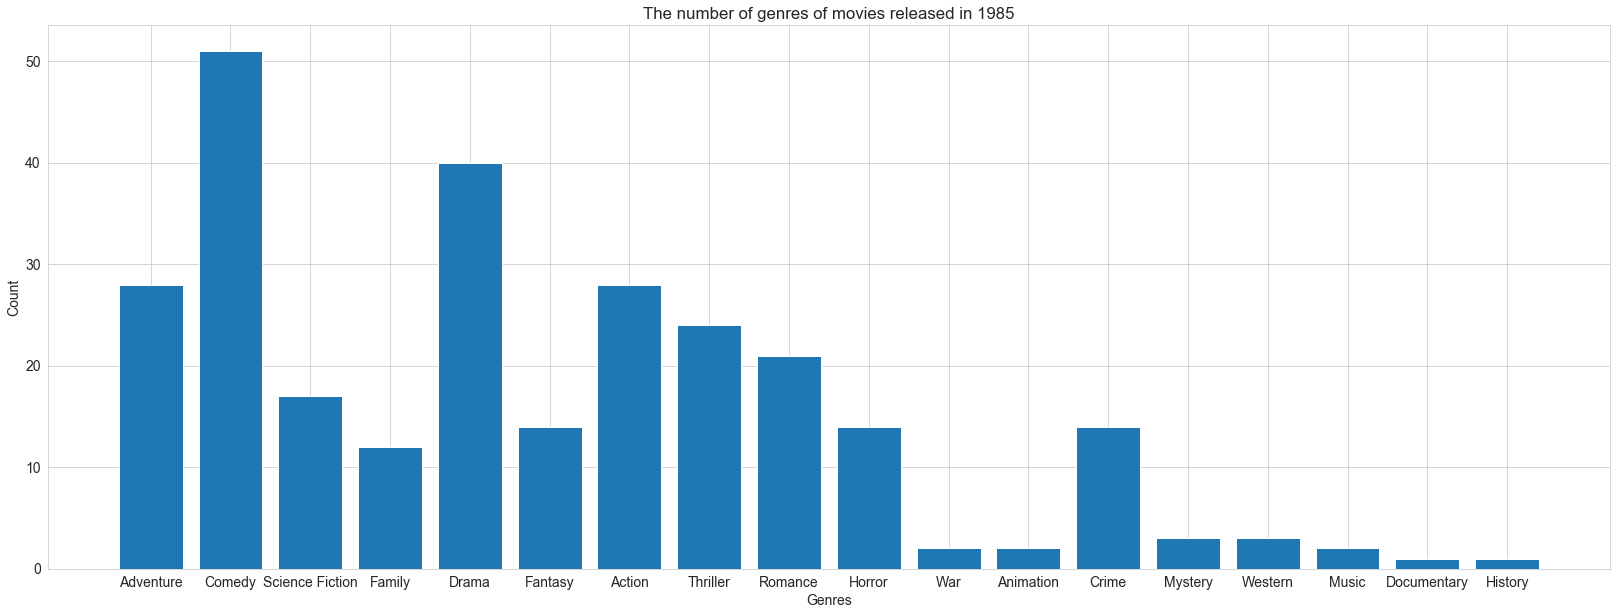

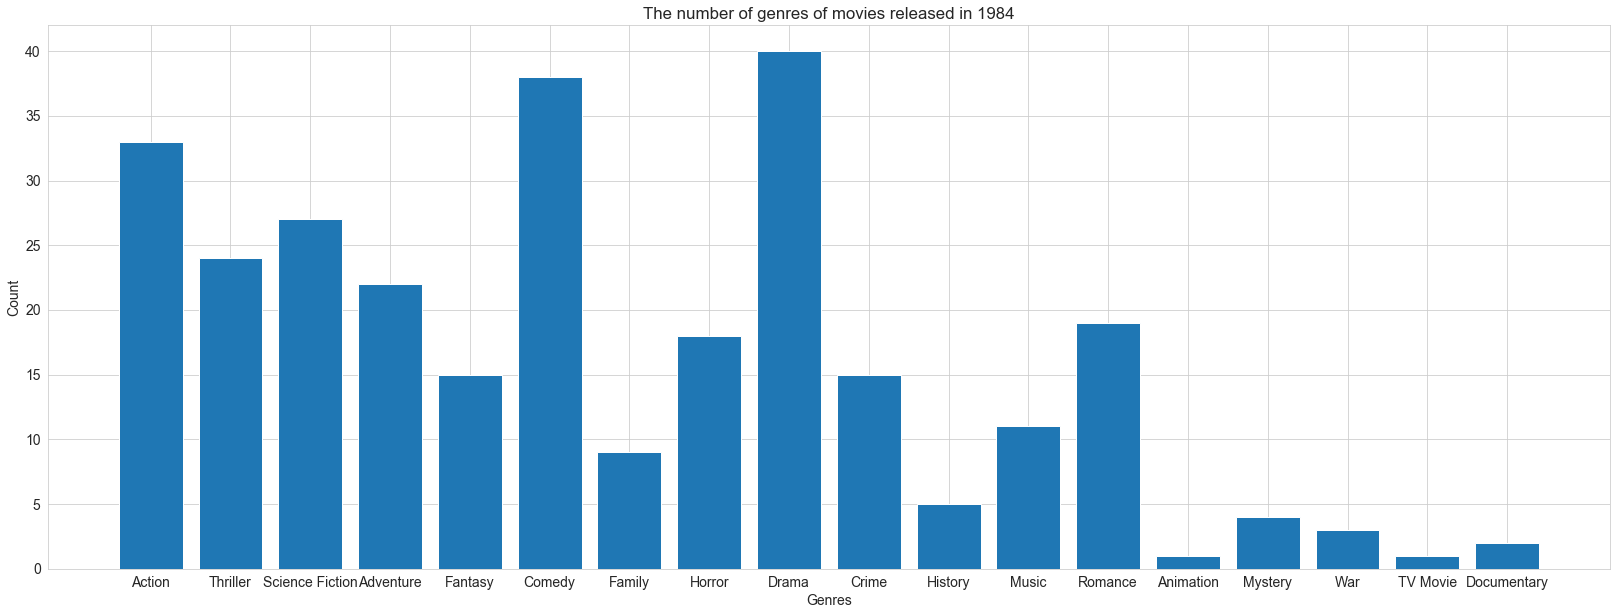

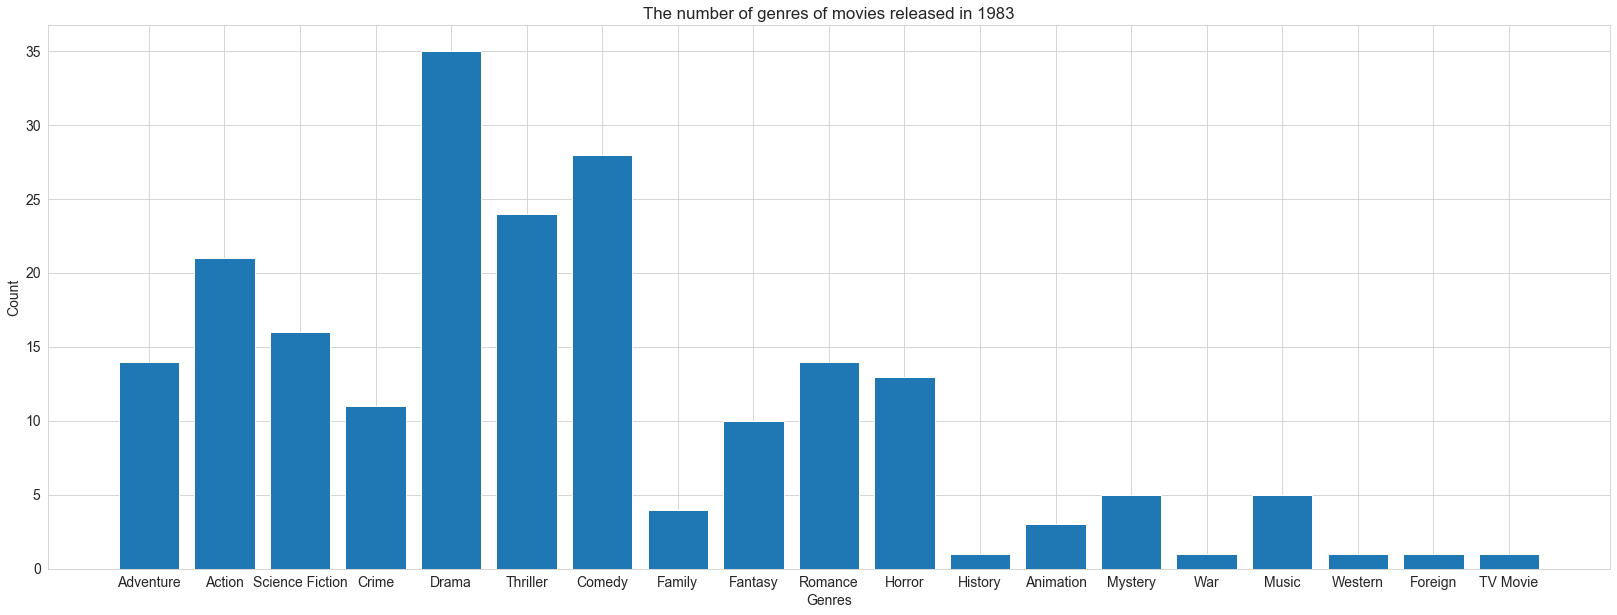

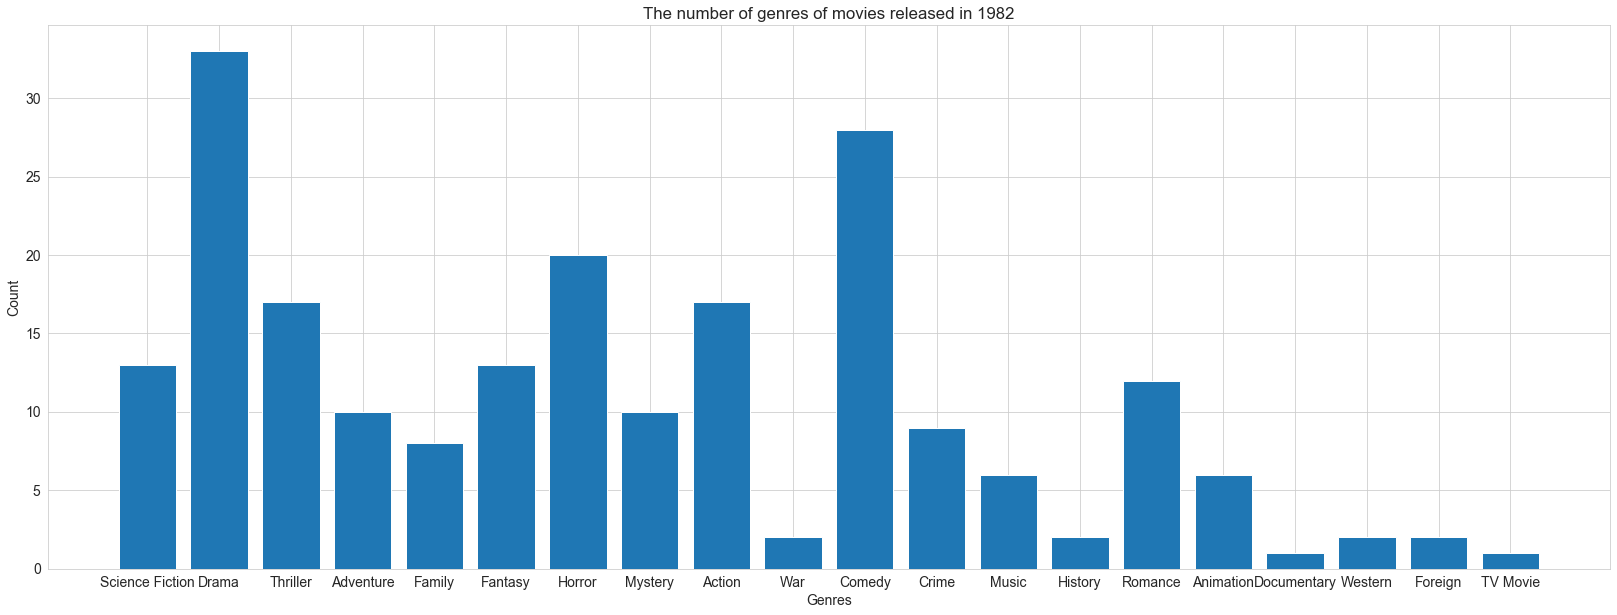

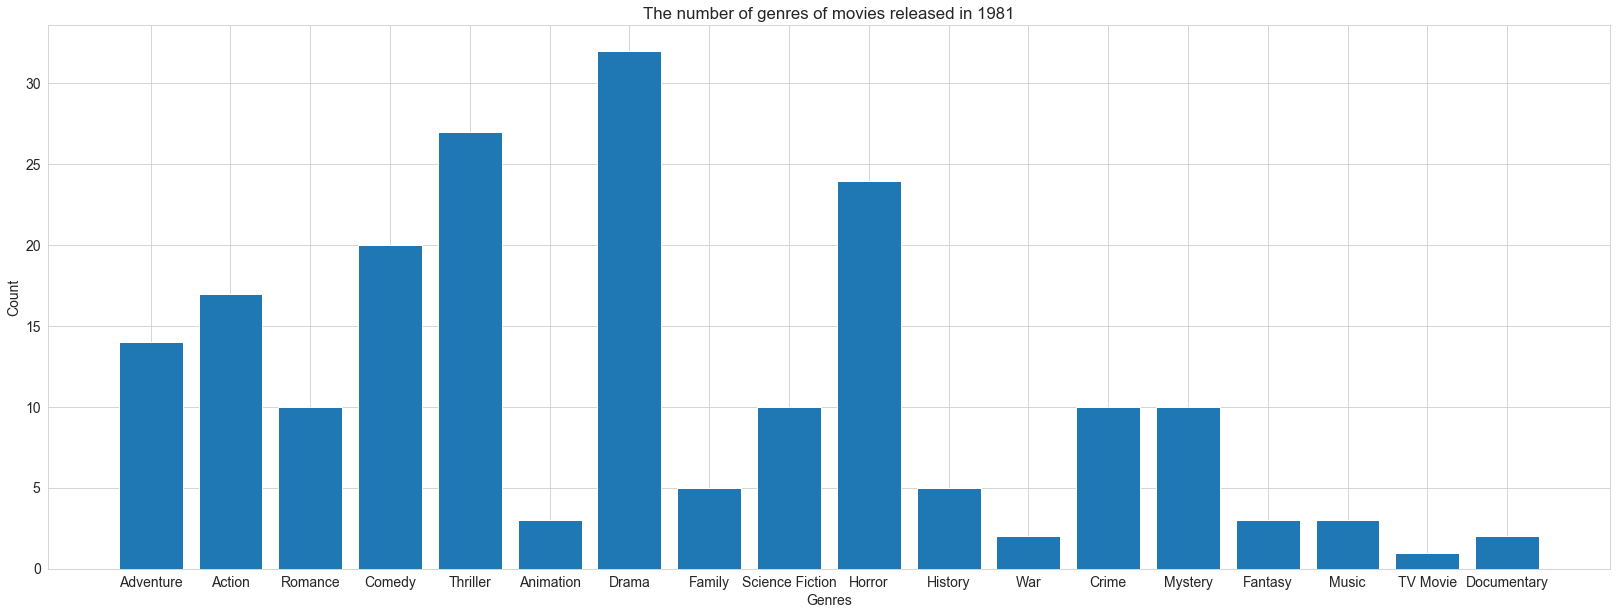

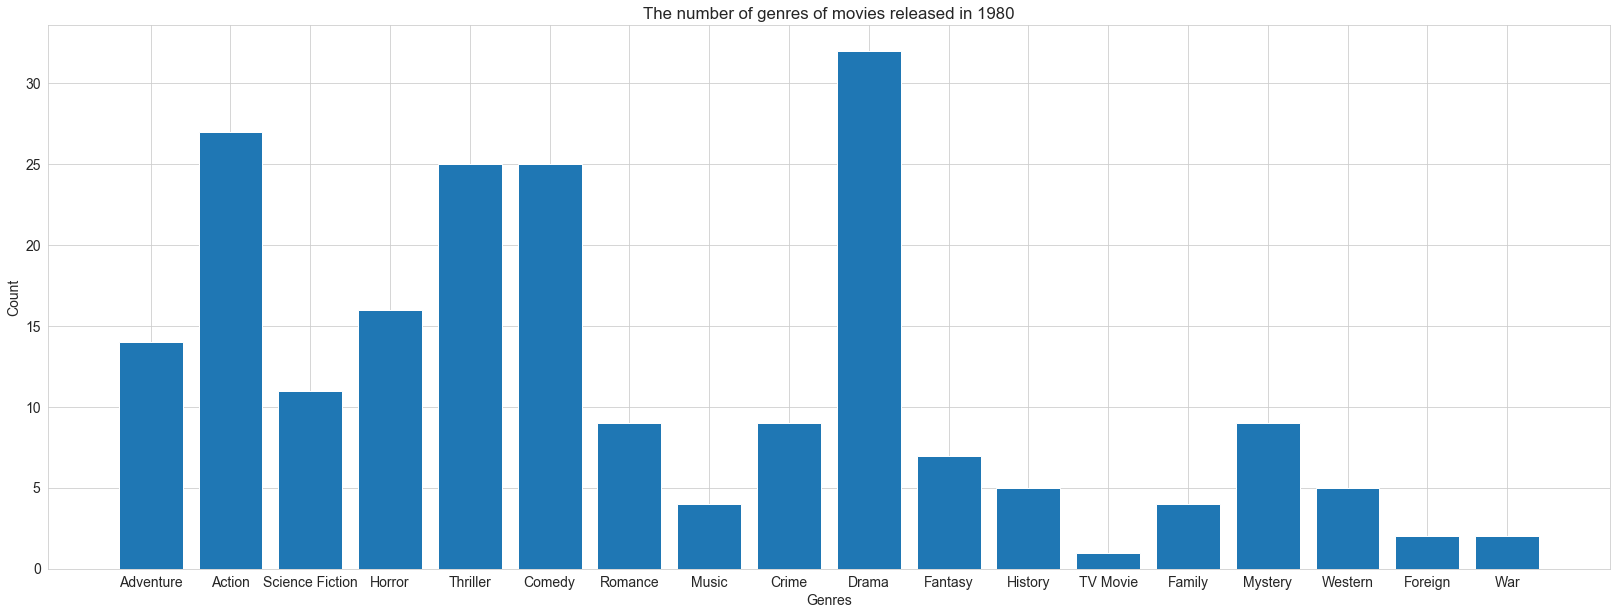

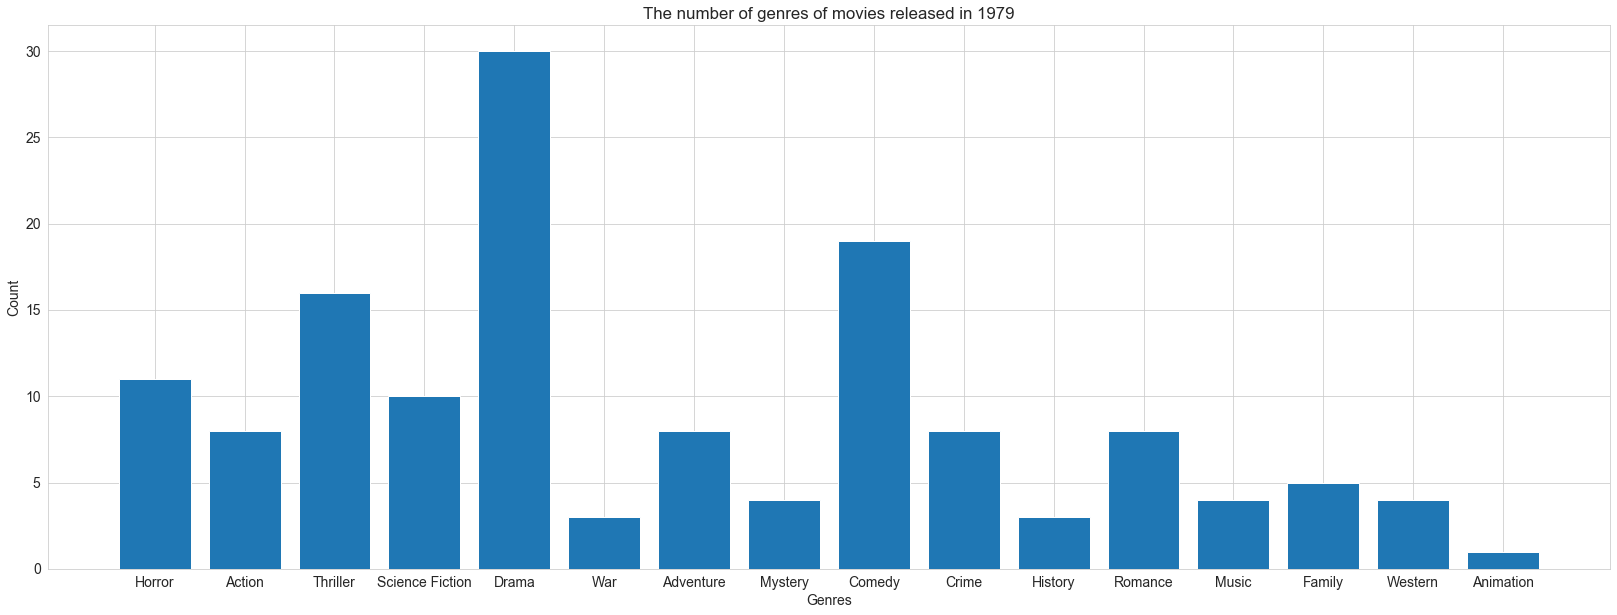

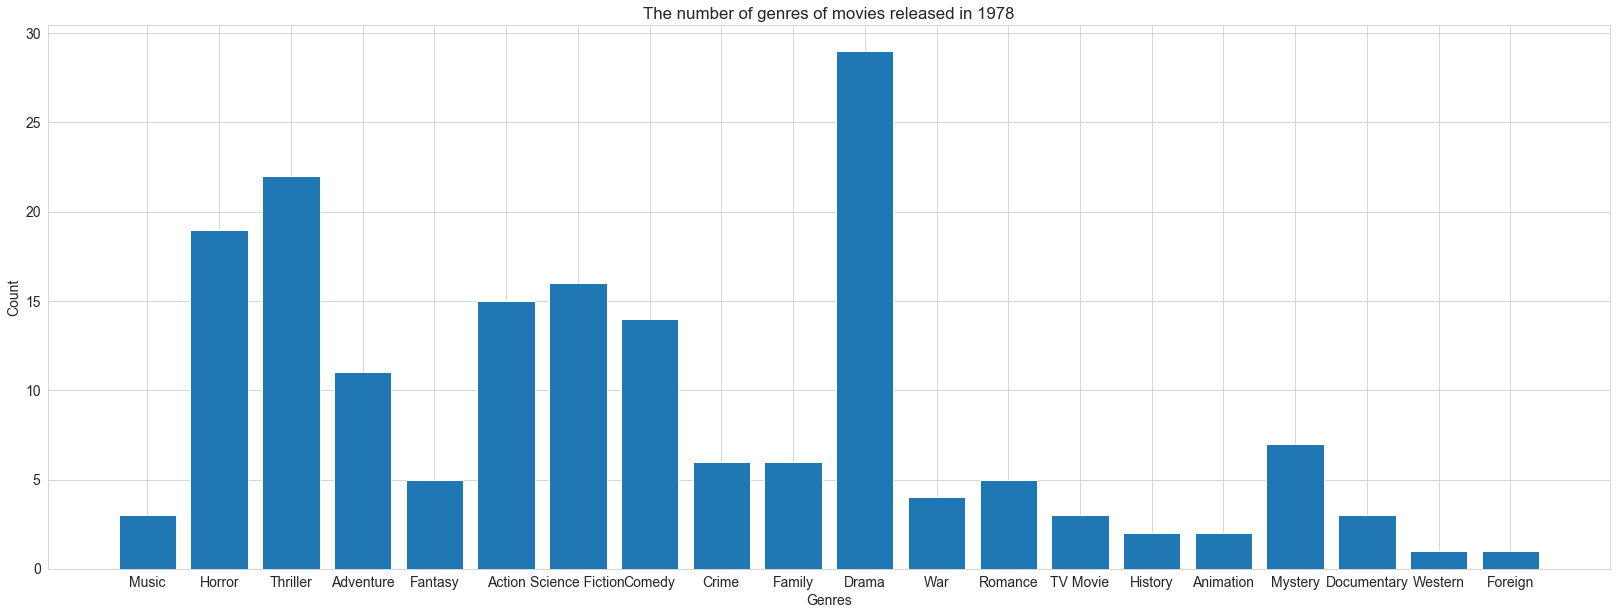

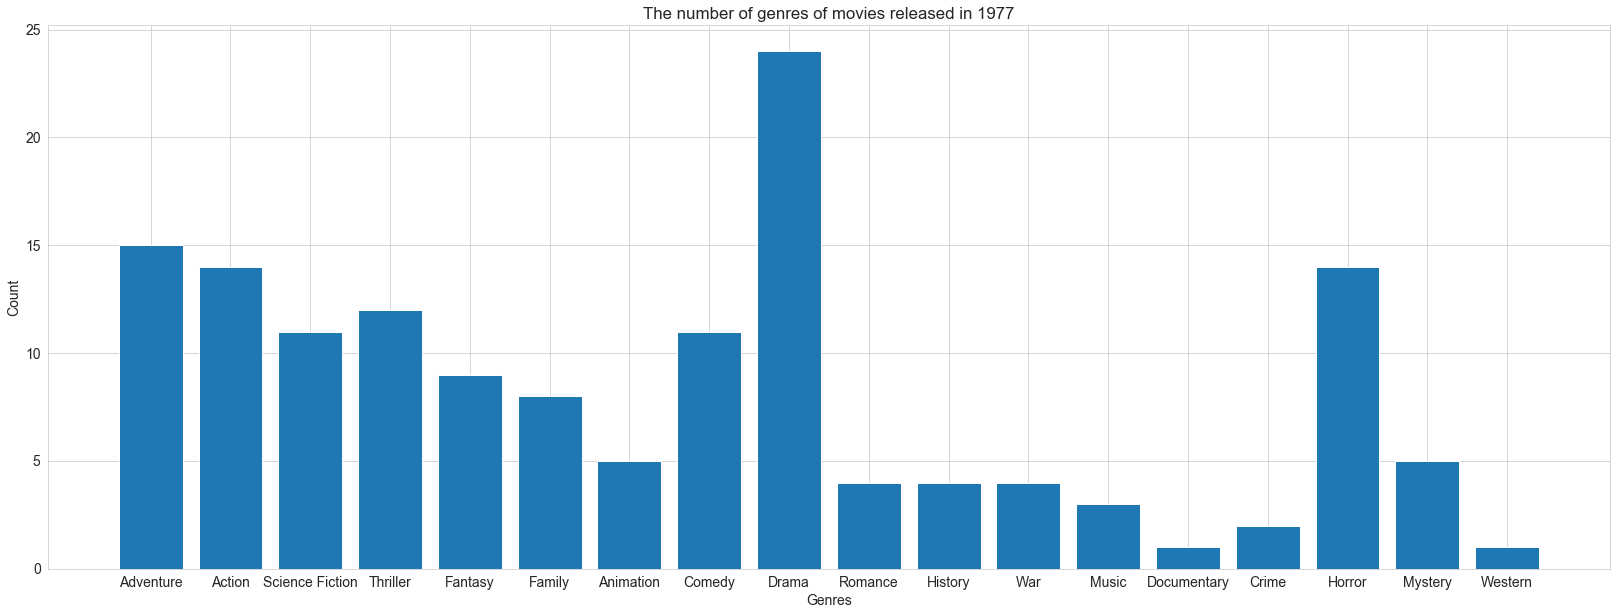

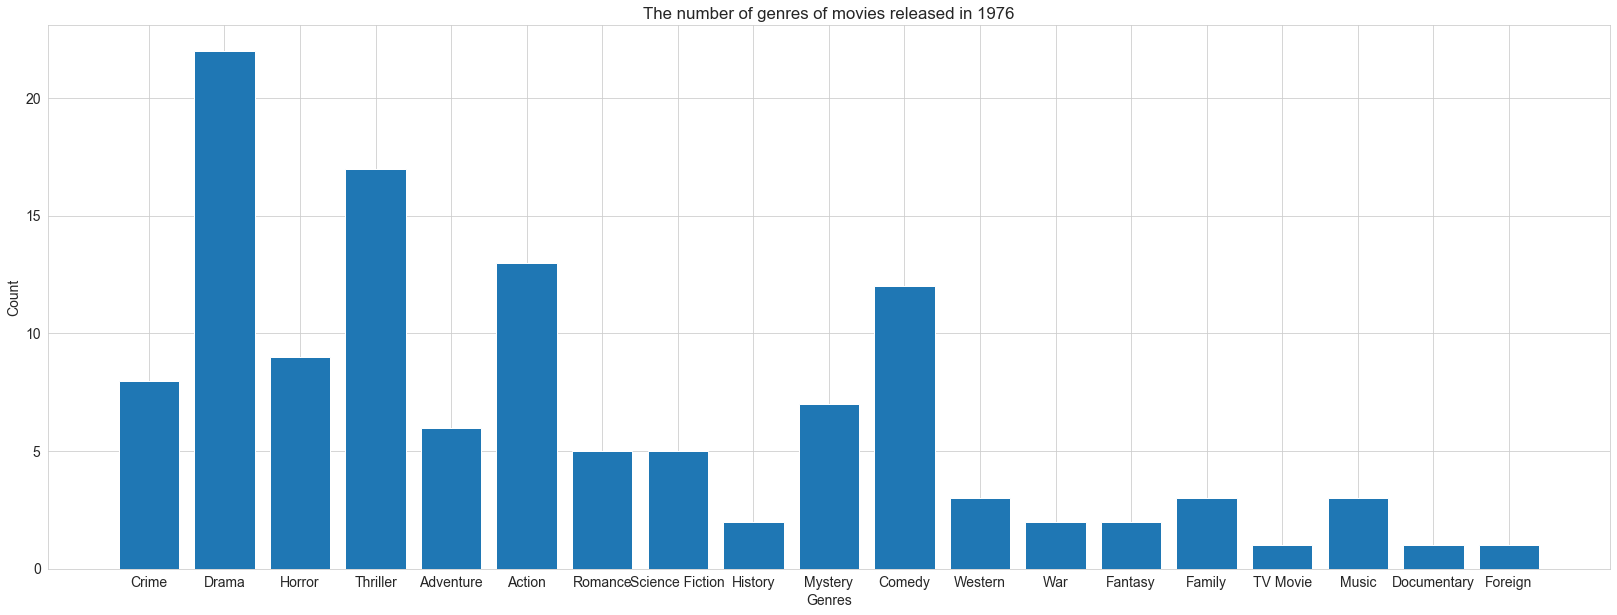

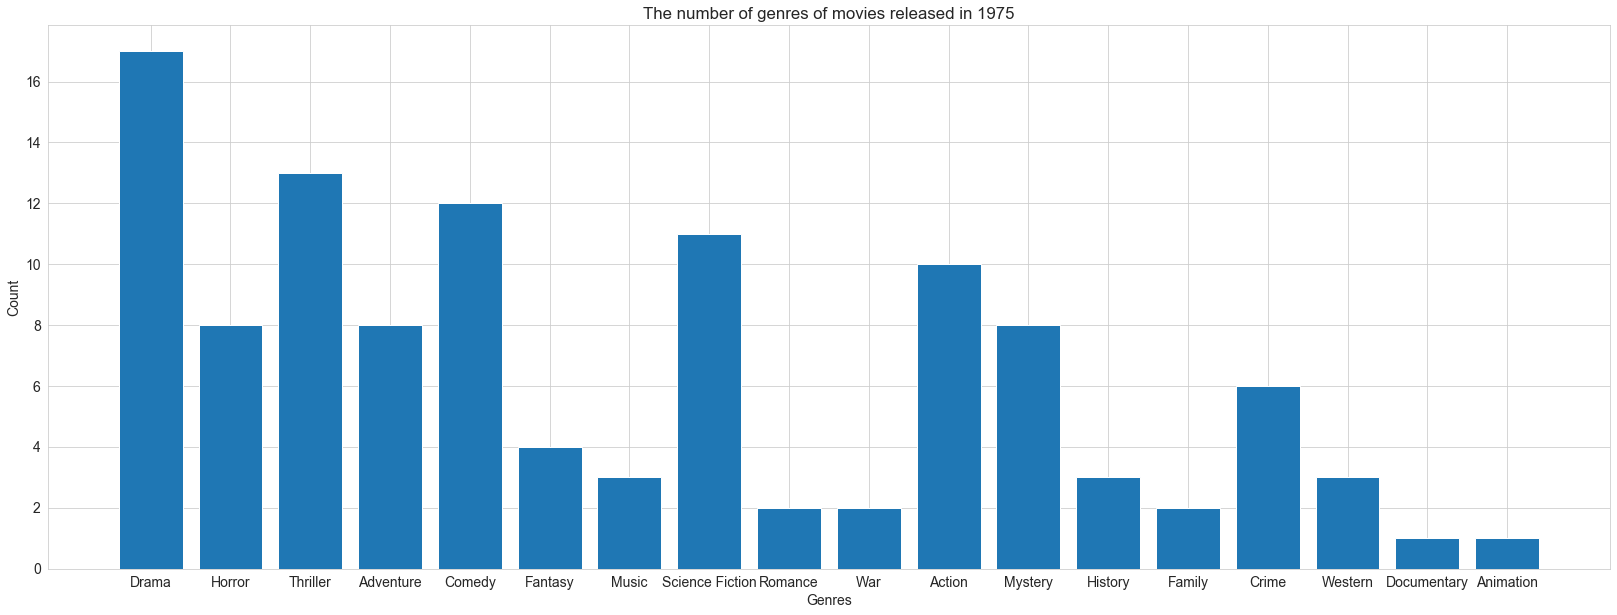

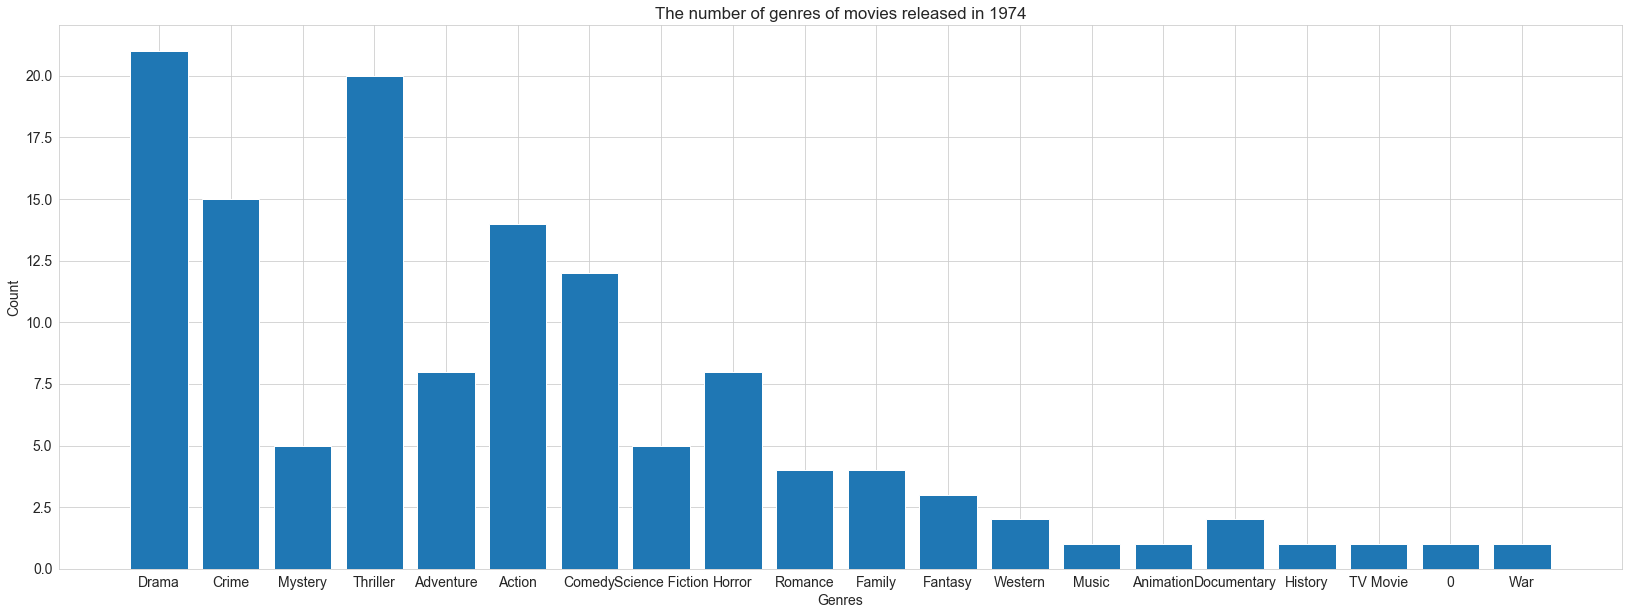

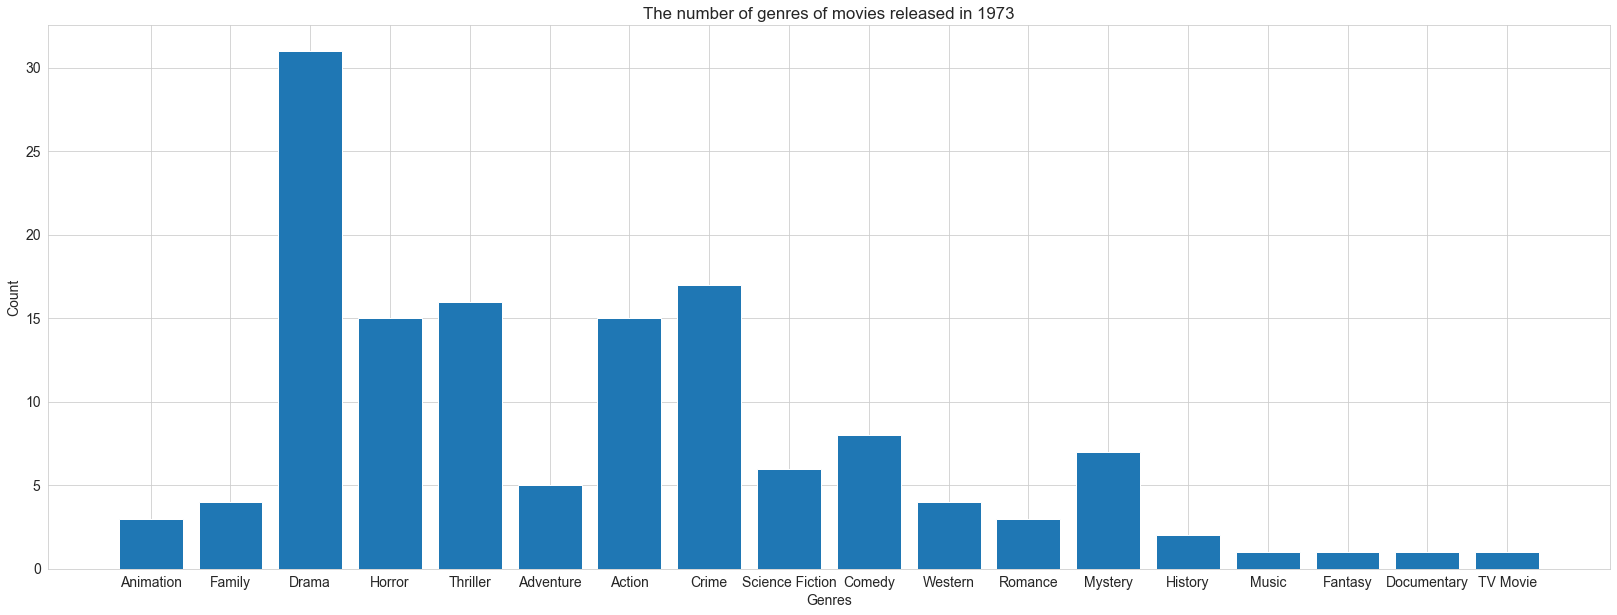

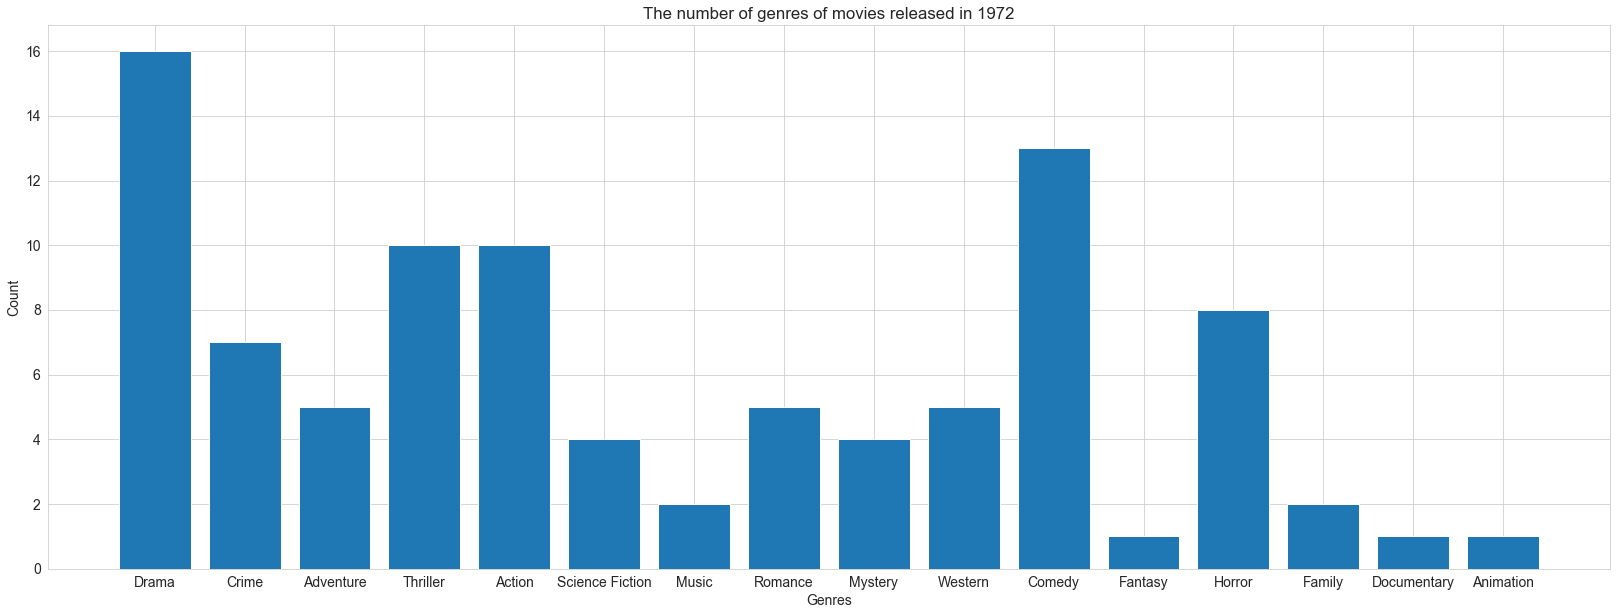

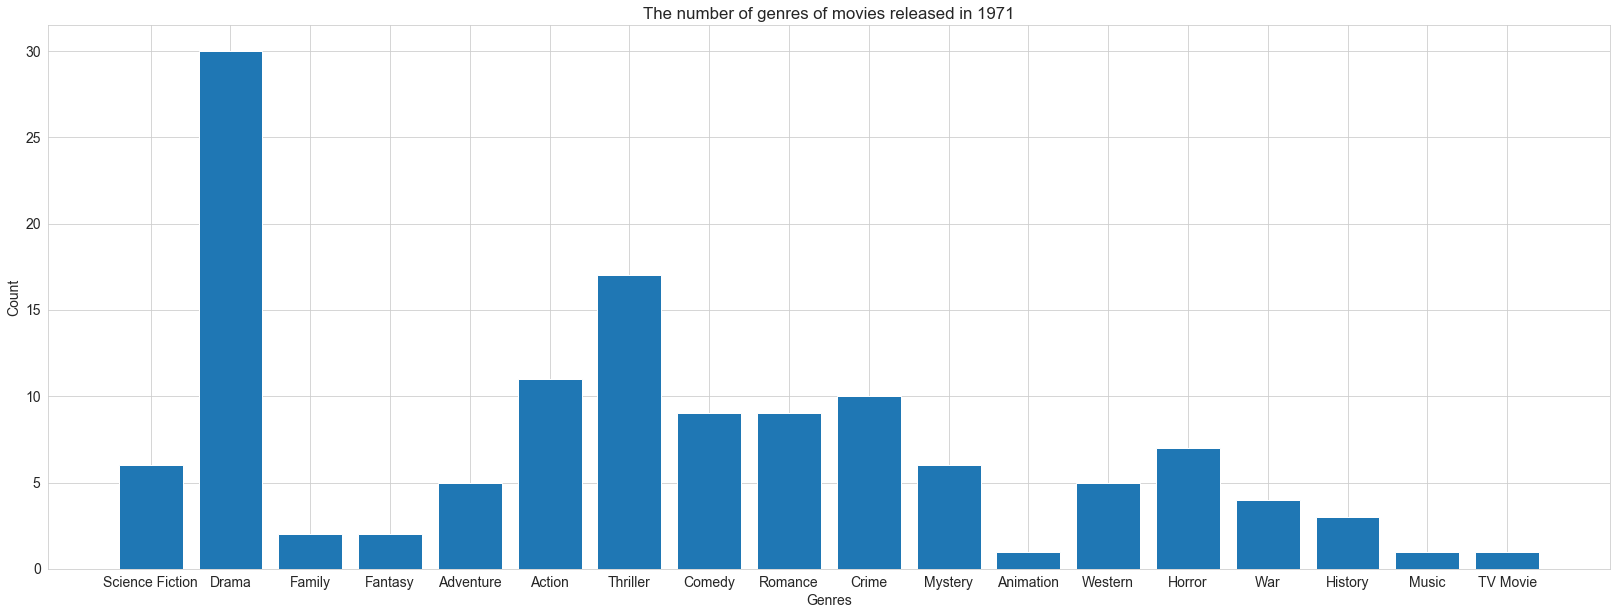

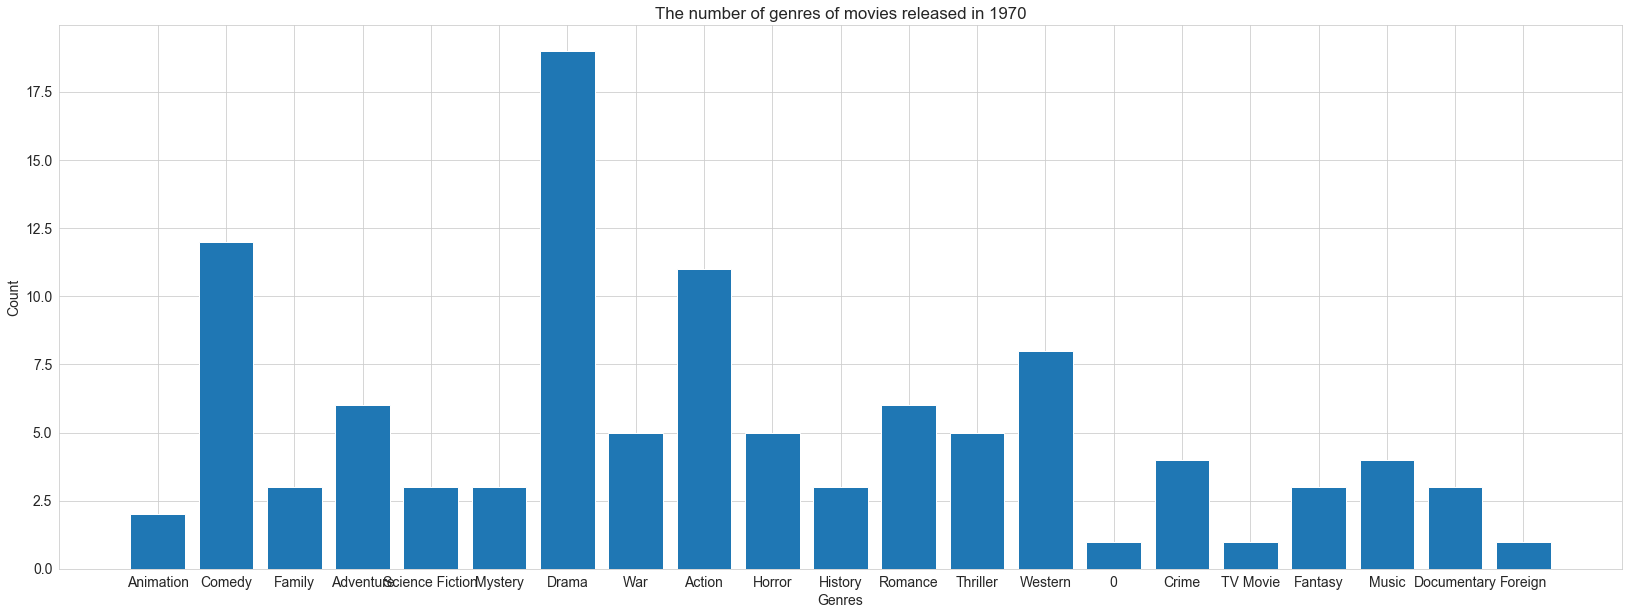

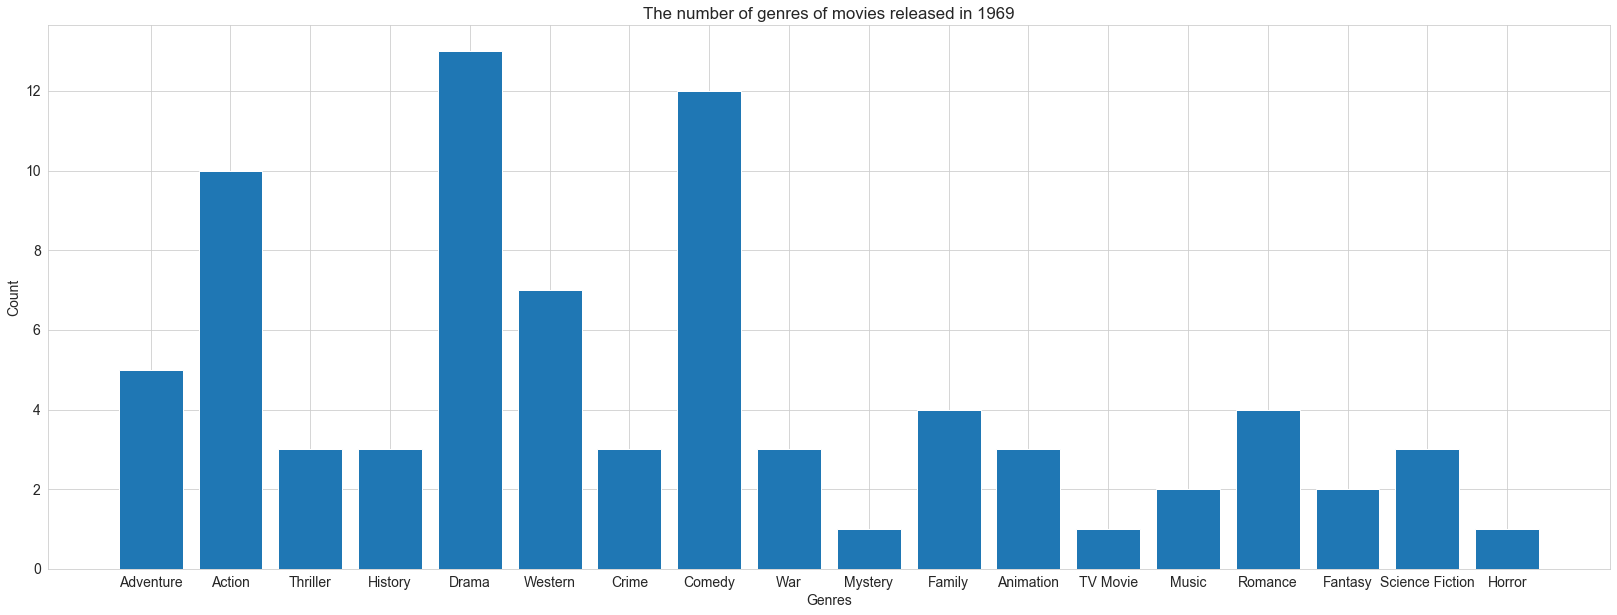

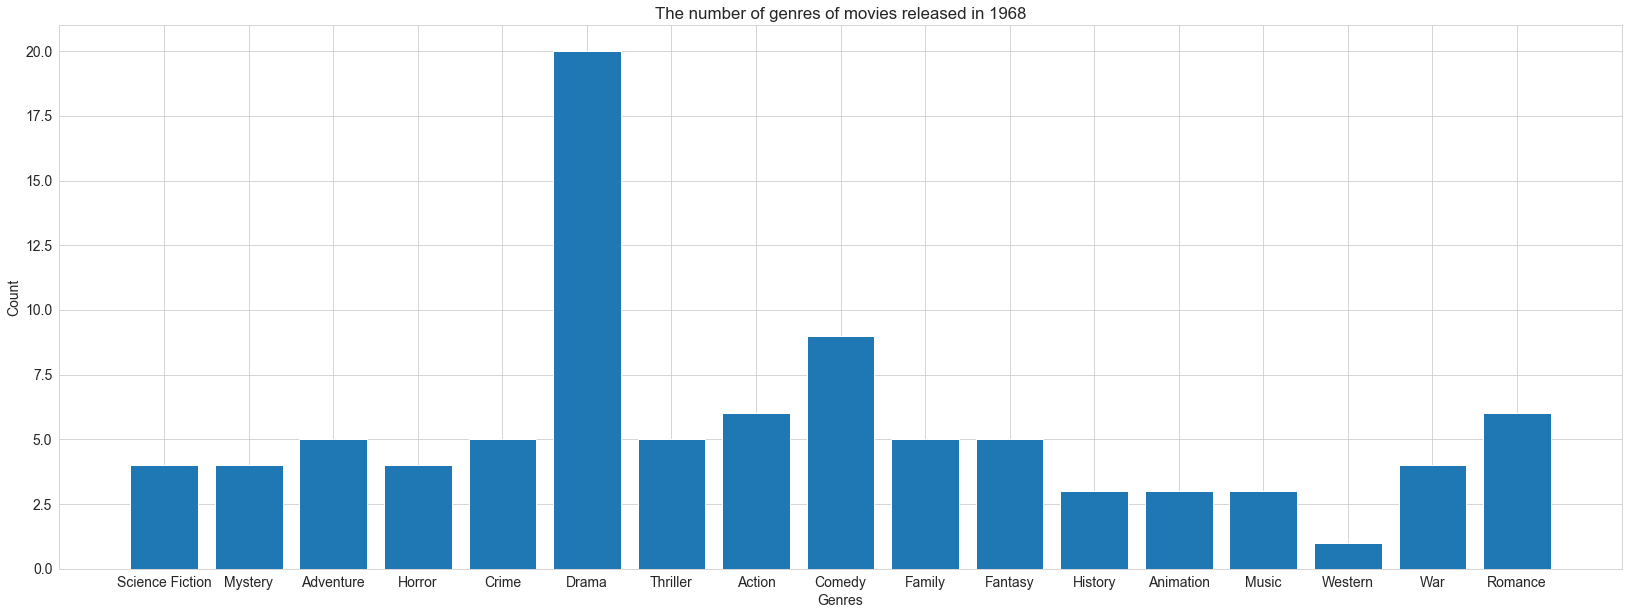

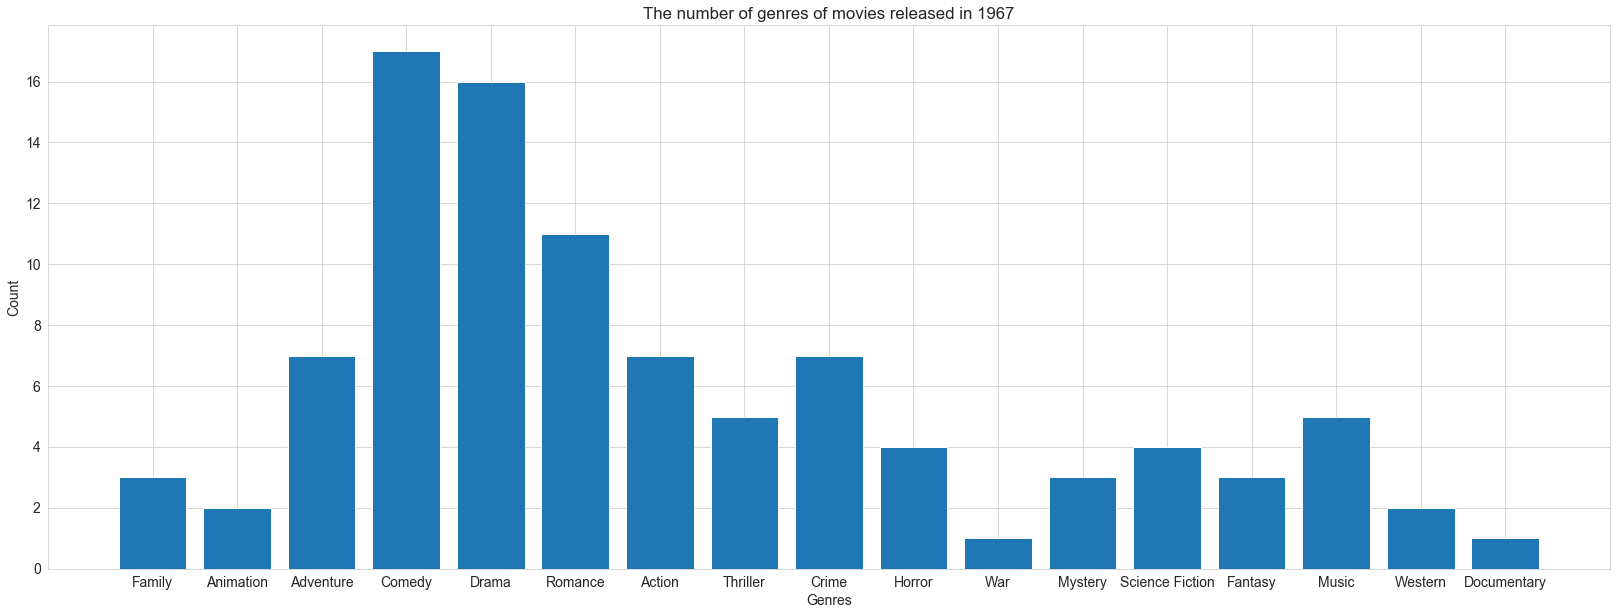

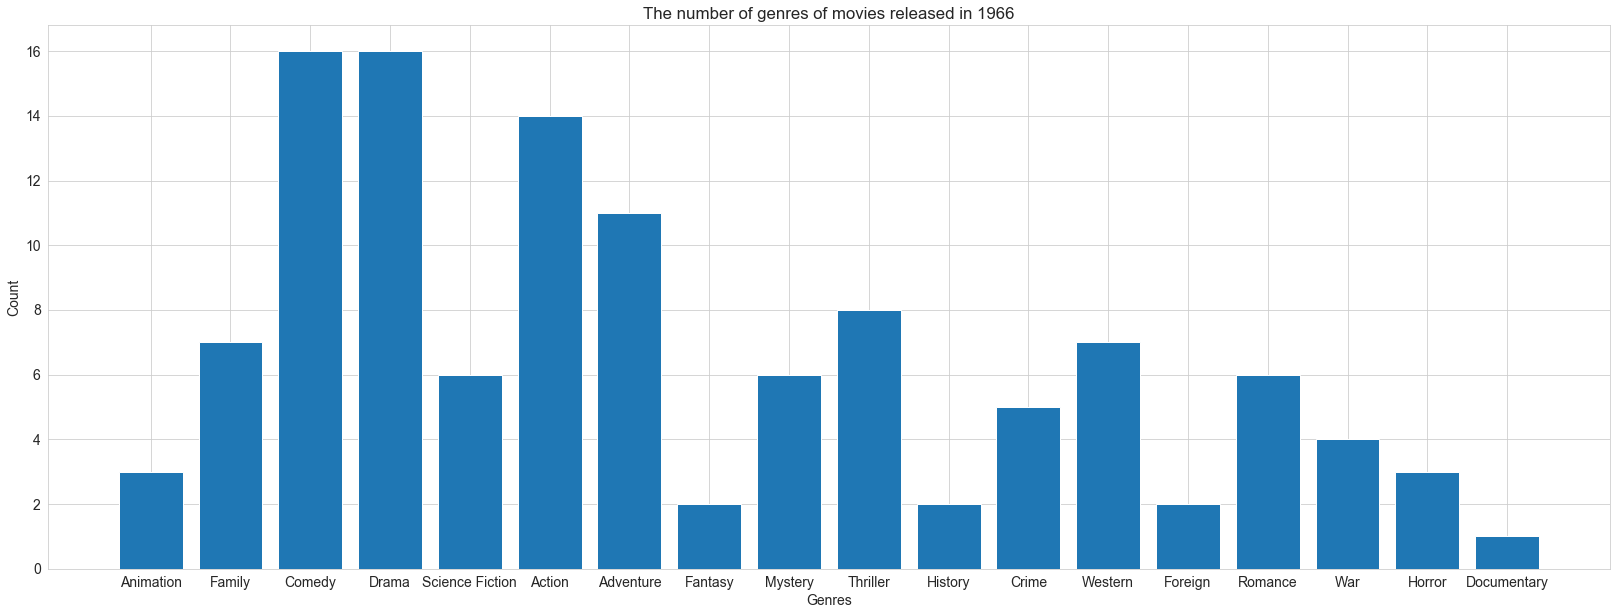

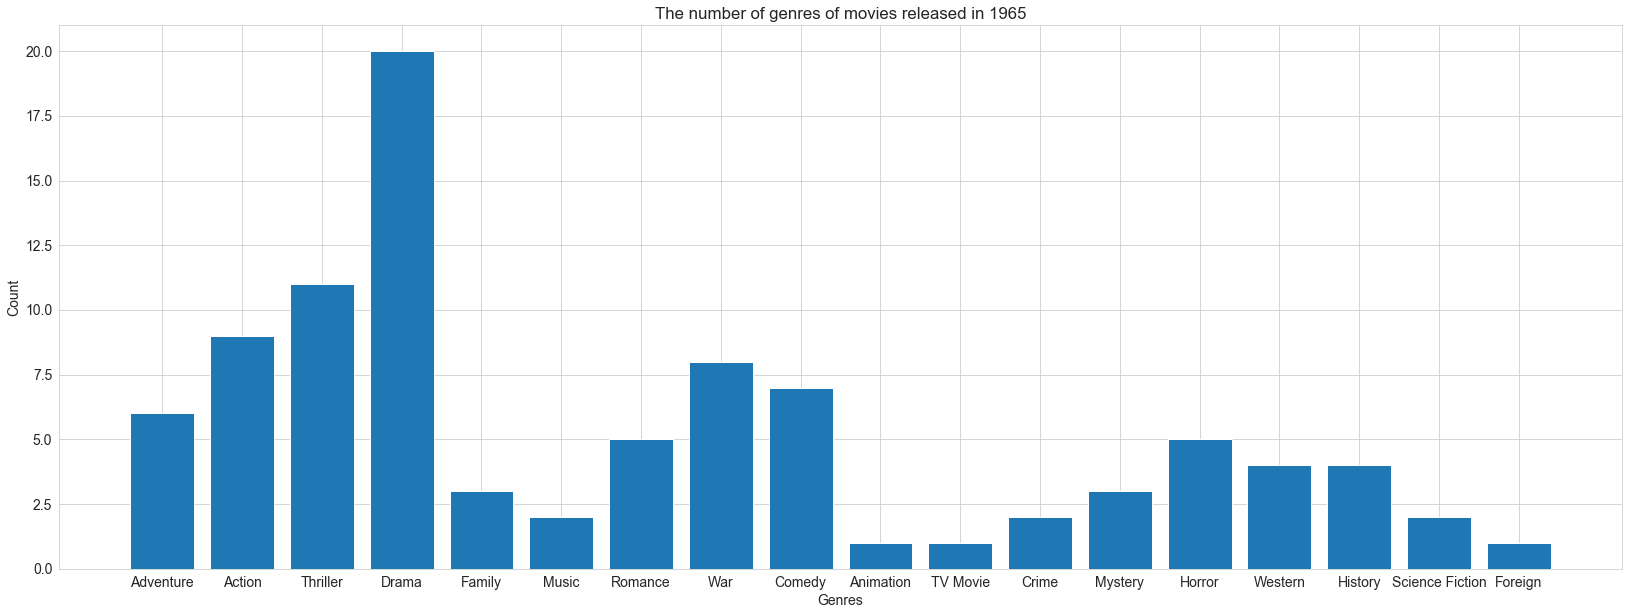

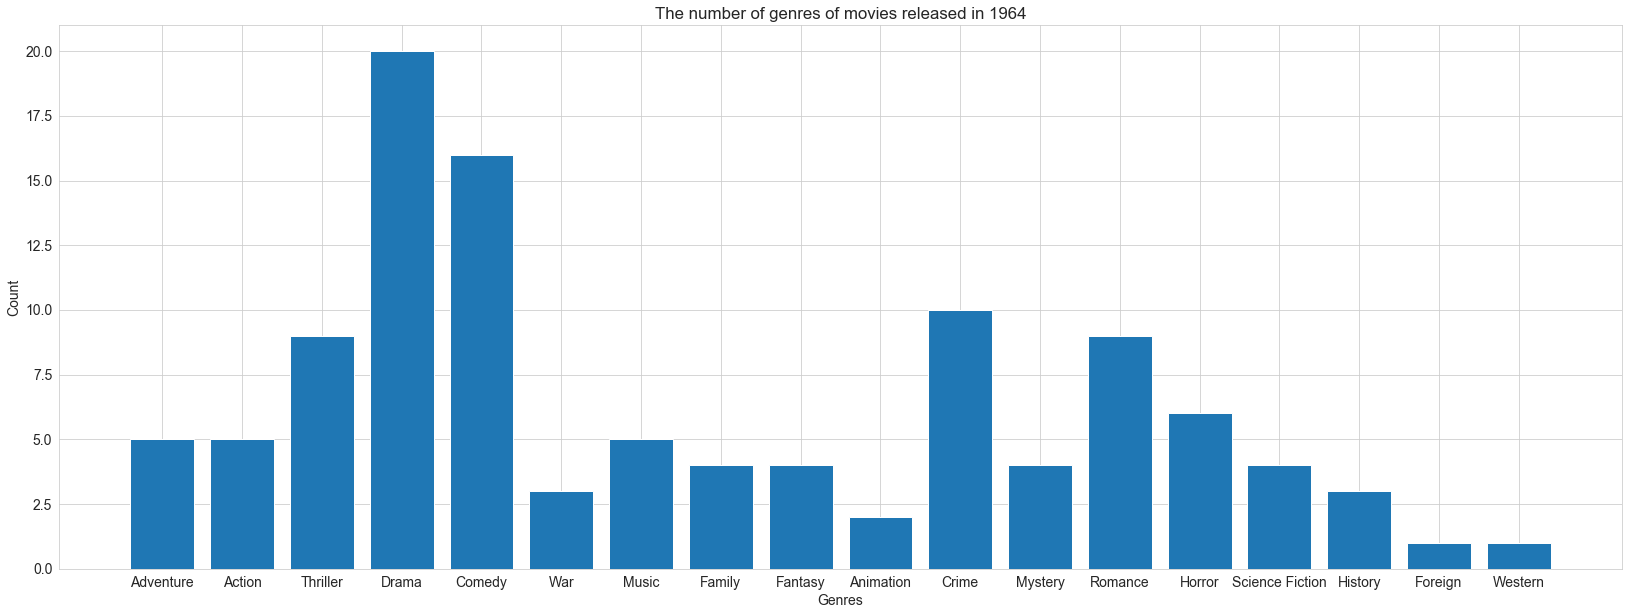

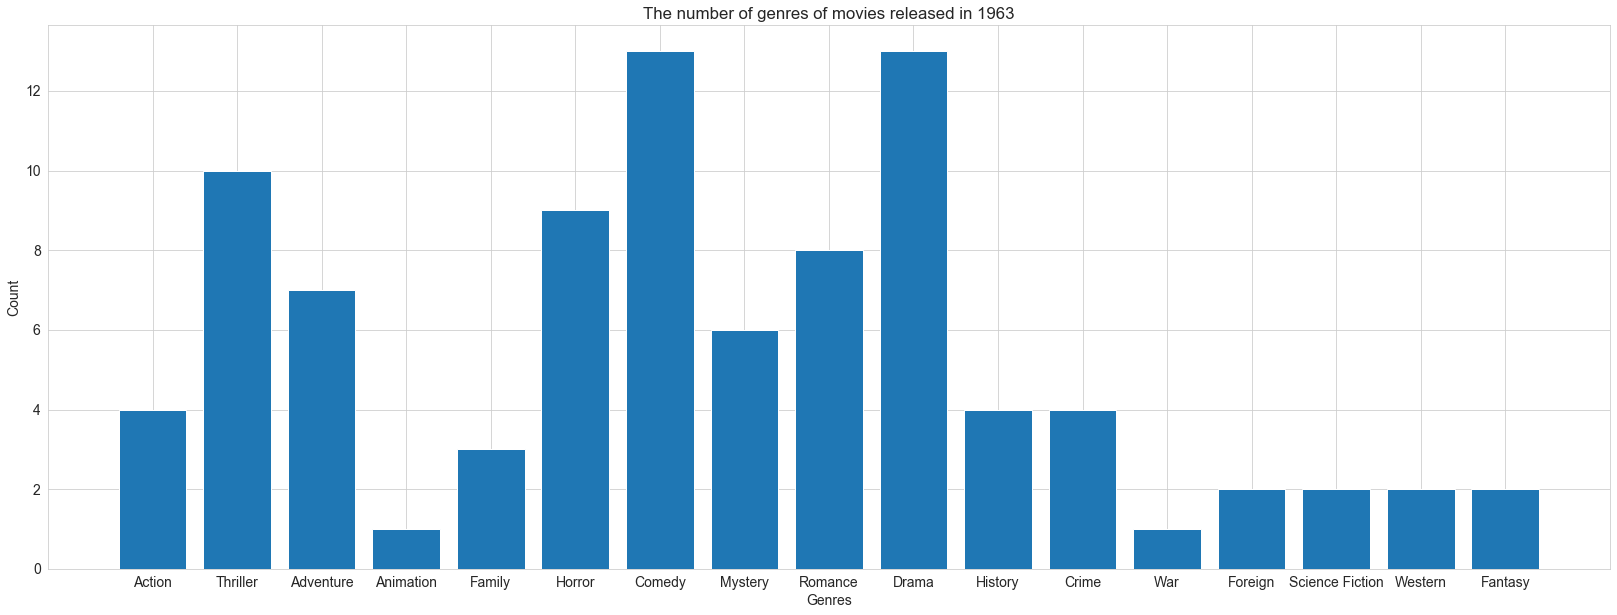

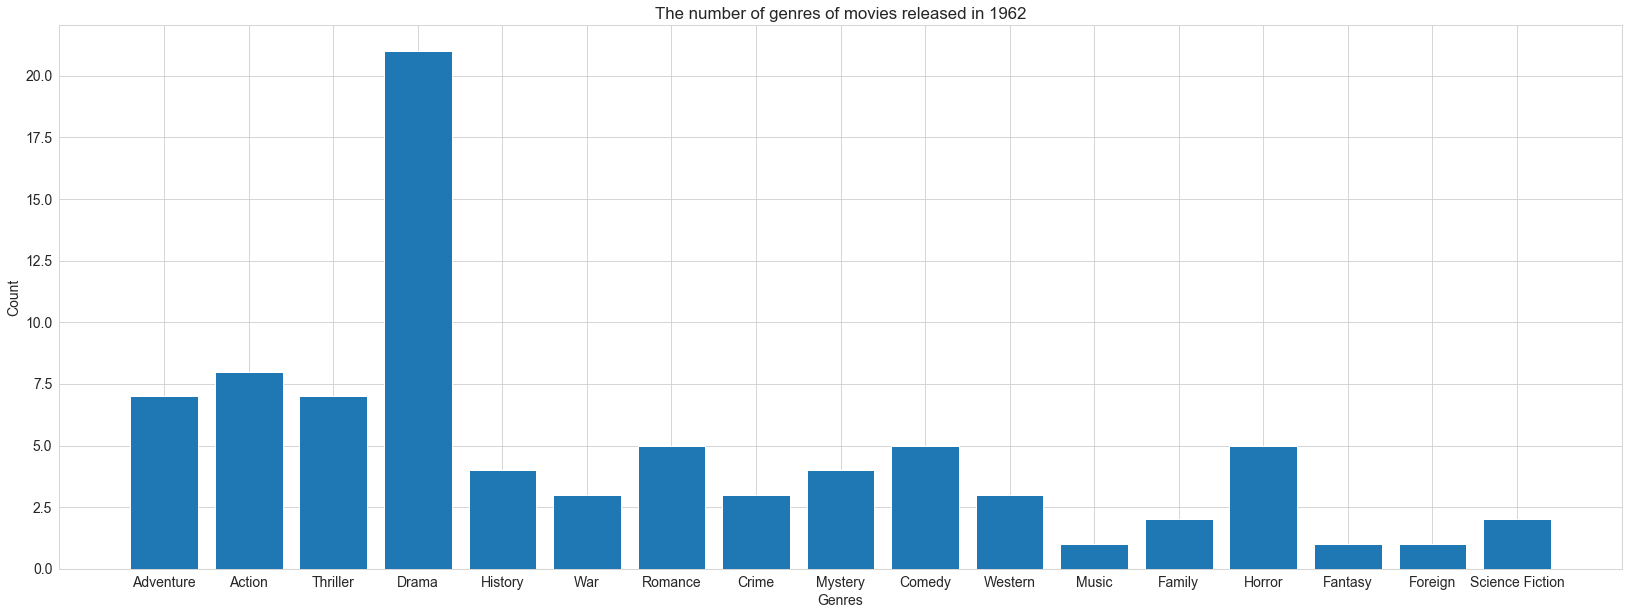

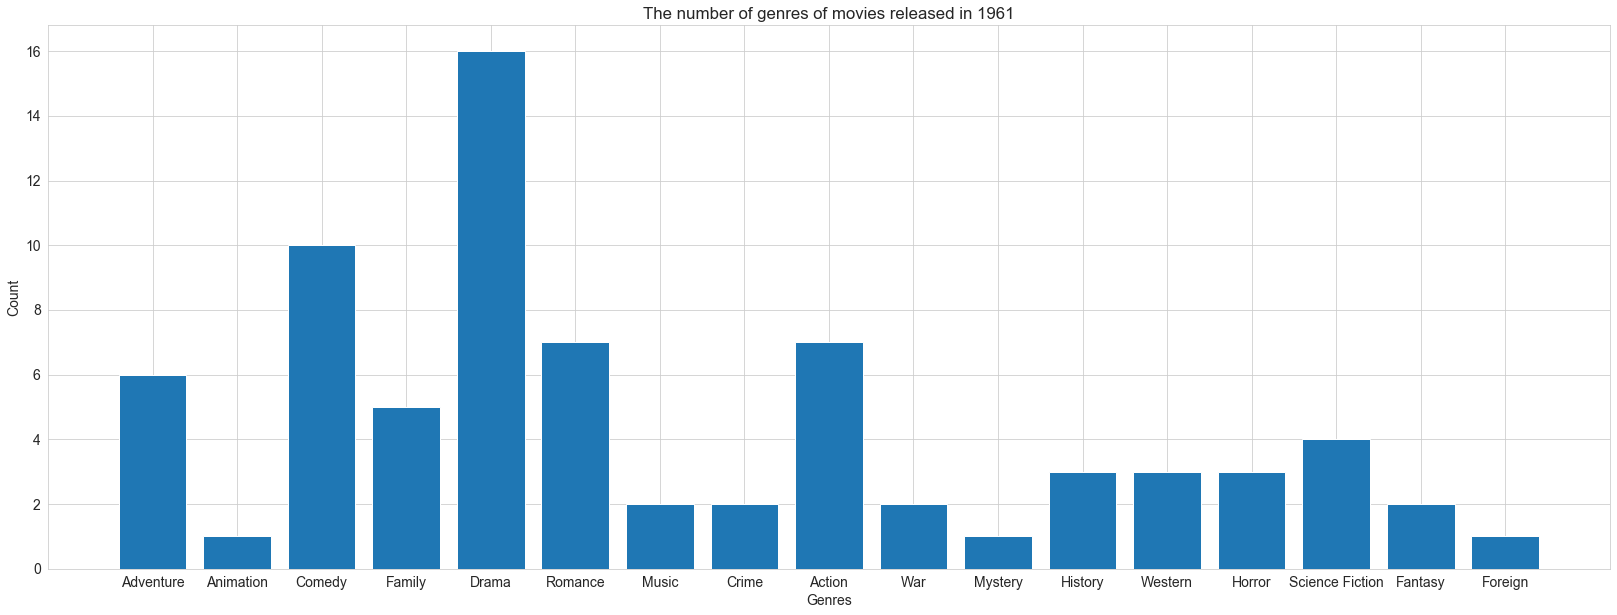

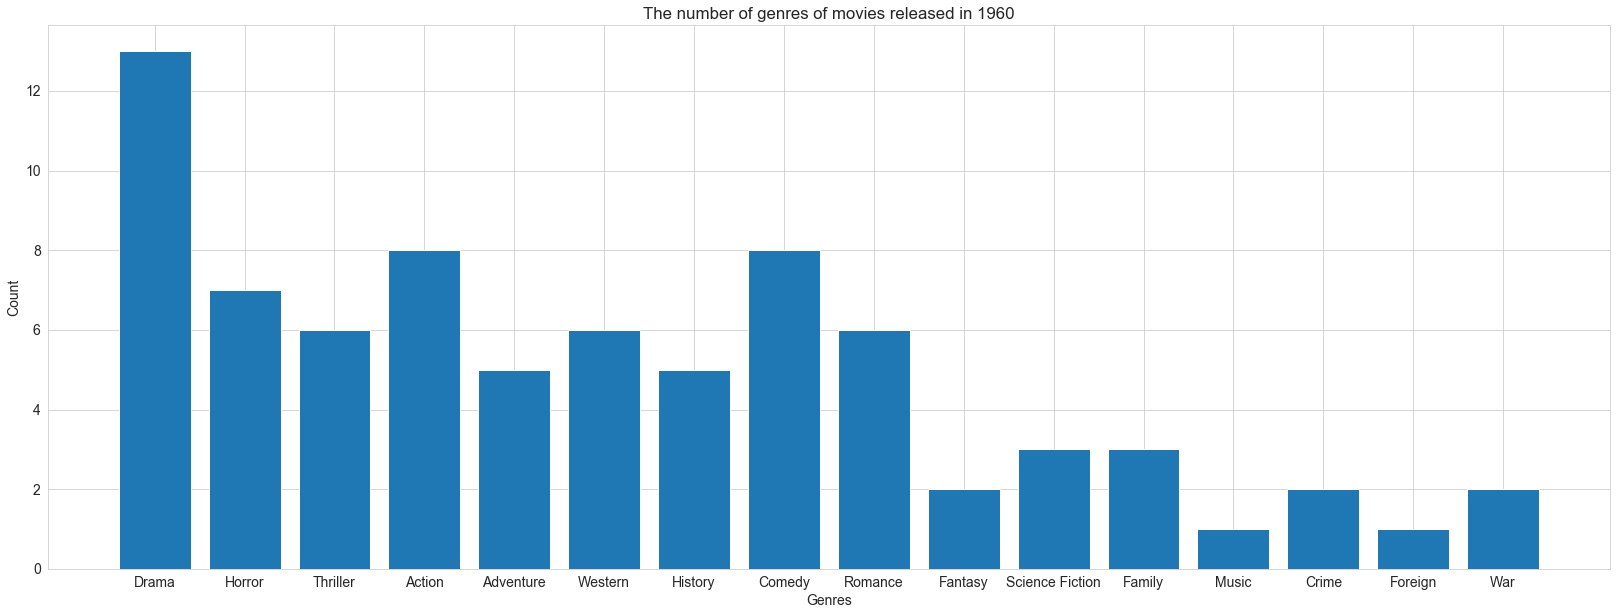

In [11]:
# change the plot mode to 'white'
sns.set_style('whitegrid')

# list storing the most released genre in specific year
most_genre = [ ]

# barplot of the number of genres of movies relased in '1960 ~ 2015'
for year in sorted(list(genre_year.keys()), reverse=True):
    fig, ax = plt.subplots(figsize=(28,10))
    plt.bar(list(genre_year[year].keys()), list(genre_year[year].values()), align='center')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title(f'The number of genres of movies released in {year}')
    plt.rc('font', size=14)
    # storing the most release genre in specific year
    most_genre.append(  [year, max(genre_year[year], key=genre_year[year].get) ]  )

In [12]:
most_genre[:5]

[[2015, 'Drama'],
 [2014, 'Drama'],
 [2013, 'Drama'],
 [2012, 'Drama'],
 [2011, 'Drama']]

### Q 1) conlcusion
> 'most_genre' contains the most released genre in specific year
>
> It turned out that 'Drama' was the most released genre for most of the years and 'Comedy' was the second most released genre
>
> I think 'Comedy' is the second most released genre because many 'Drama' movies are also 'Comedy'.

### Q 2) Which month was the movie released the most?

Text(0.5, 1.0, 'Monthly released movie')

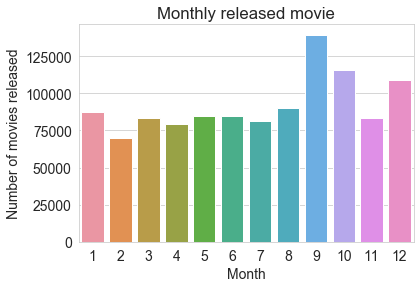

In [13]:
# count the monthly released movie using 'pivot_table'
month_df = df.pivot_table(index='release_month', values='runtime', aggfunc='sum').reset_index()
month_df['release_month'] = month_df['release_month'].astype(int)

# draw the barplot of 'Monthly released movie'
sns.barplot(data=month_df, x='release_month', y='runtime')
plt.ylabel('Number of movies released')
plt.xlabel('Month')
plt.title('Monthly released movie')

### Q 2) conlcusion
> It turned out more movies tend to be released in the end of the year.
>
> The most movies were released in September

### Q 3) What were the feautres that the movie with high net profit had?

In [14]:
'''
    since more than 50% of the data have no 'budget' or 'revenue' values, I have concluded that it will be meaningless to
    further process Question 3.
'''
print(df['budget'].value_counts())
print(df['revenue'].value_counts())
df['revenue'].hist()

KeyError: 'budget'

### Q 3) conlcusion
> So many of our data are missing values of budget and revenue. I concluded that it will be no use to analyze our data in terms of budget and revenue.
>

### Q 4) What were the feature that popular movies had?

In [15]:
df.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201,3


In [16]:
'''
    I have considered movies that have the popularity score within top 10% as 'POPULAR MOVIES'
'''
df_p = df[df['popularity'] >= df['popularity'].quantile(0.9)]

# Relationship between popularity and runtime
popular_runtime = df_p['runtime'].mean()
runtime = df['runtime'].mean()
print(f'Top_10_runtime: {popular_runtime}')
print(f'Whole_runtime: {runtime}')

Top_10_runtime: 113.05151793928243
Whole_runtime: 102.07179015186378


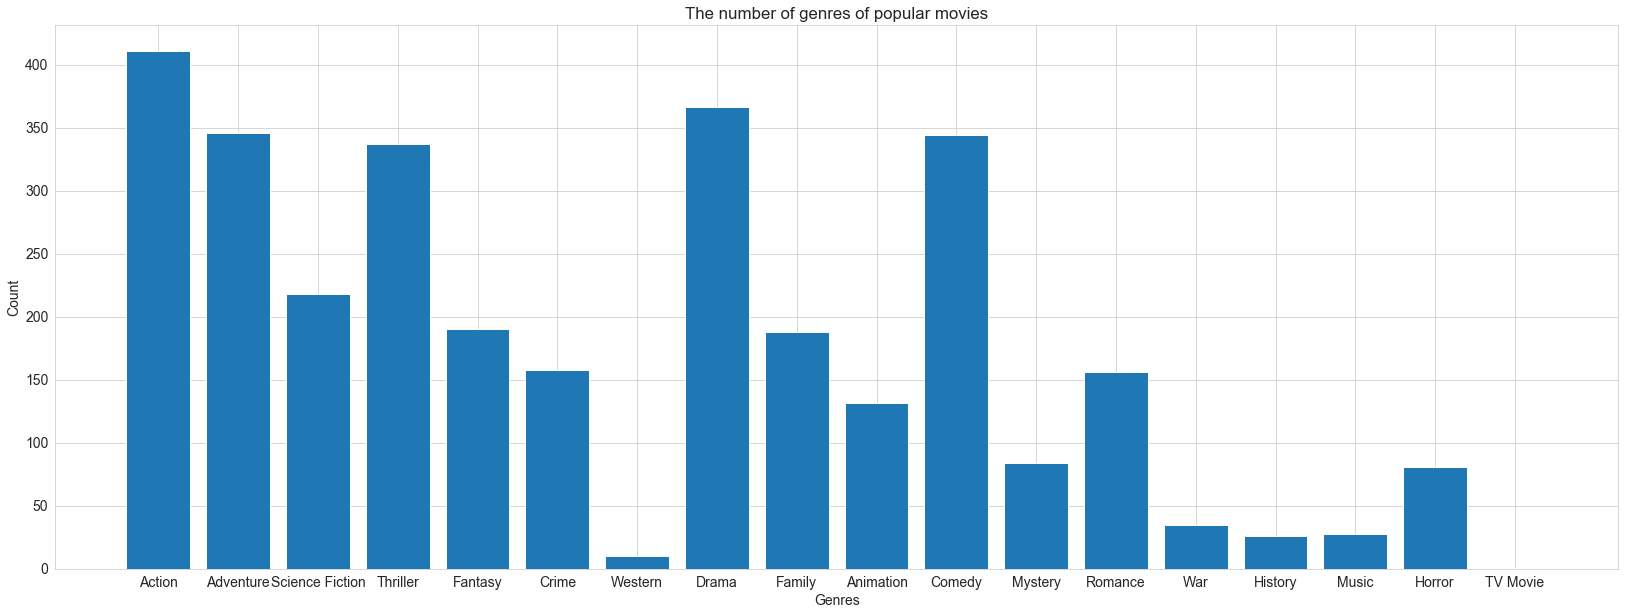

In [17]:
# What genre was most popular in popular movies
genre_p = { }
for i in range(len(df_p)):
    genres = df_p.iloc[i]['genres']
    split = genres.split('|')
    for item in split:
        if item not in genre_p:
            genre_p[item] = 1
        else:
            genre_p[item] += 1
            
# barplot of the number of genres of popular movies
fig, ax = plt.subplots(figsize=(28,10))
plt.bar(list(genre_p.keys()), list(genre_p.values()), align='center')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('The number of genres of popular movies')
plt.rc('font', size=14)

Text(0, 0.5, 'Number of movies released')

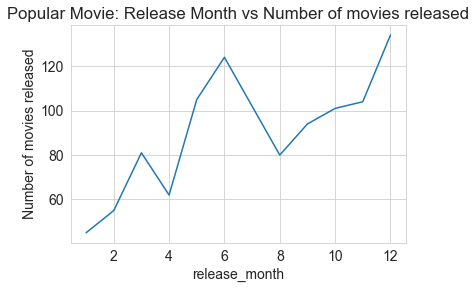

In [18]:
# Relationship between popularity and month
a = df_p.groupby('release_month')['vote_average'].count().reset_index()
a['release_month'] = a['release_month'].astype(int)
a = a.sort_values(by='release_month')
sns.lineplot(data=a, x='release_month', y='vote_average')
plt.title("Popular Movie: Release Month vs Number of movies released")
plt.ylabel('Number of movies released')

Text(0, 0.5, 'Number of movies released')

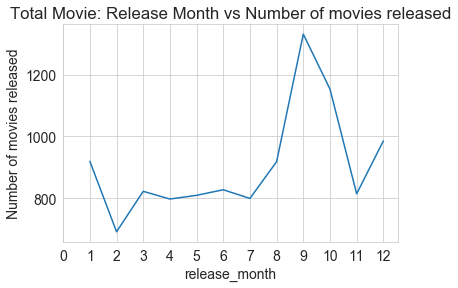

In [19]:
a = df.groupby('release_month')['vote_average'].count().reset_index()
a['release_month'] = a['release_month'].astype(int)
a = a.sort_values(by='release_month')
g=sns.lineplot(data=a, x='release_month', y='vote_average')
g.set_xticks(range(13))
g.set_xticklabels=[ str(x) for x in range(1,13) ]
plt.title("Total Movie: Release Month vs Number of movies released")
plt.ylabel('Number of movies released')

In [20]:
df_p.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201,3
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1868178225,12
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1316249360,4


In [21]:
# Relationship between popularity and director
top_five_dir = df_p.assign(dir=df_p['director'].str.split('|')).explode('dir')['dir'].value_counts()[:3]
top_five_dir

Steven Spielberg    18
Ridley Scott        13
Tim Burton          13
Name: dir, dtype: int64

In [27]:
aaa = df_p.assign(dir=df_p['cast'].str.split('|')).explode('dir')
aaa.head(30)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit,release_month,dir
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6,Chris Pratt
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6,Bryce Dallas Howard
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6,Irrfan Khan
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6,Vincent D'Onofrio
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,6,Nick Robinson
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5,Tom Hardy
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5,Charlize Theron
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5,Hugh Keays-Byrne
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5,Nicholas Hoult
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354,5,Josh Helman


#### Q 4) conlcusion
> It turned out that there are many genres of (Action, Adventure, Thriller, Drama, Comedy) in the Popular movies(top 10%)
>
> It turned out that movies released in June and December were popular
>
> It turned out that there are many movies of (Steven Spielberg, Tim, Burton, Ridley Scott)in the popular movies

### Q 5) Which actor participated in the popular movie the most?

In [22]:
top_five_actors = df_p.assign(castt=df_p['cast'].str.split('|')).explode('castt')['castt'].value_counts()[:3]
top_five_actors

Bruce Willis      21
Robert De Niro    21
Jason Statham     19
Name: castt, dtype: int64

#### Q 5) conlcusion
> It turned out that there are many movies of (Bruce Willis, Robert De Niro, Jason Statham) in the popular movies

<a id='conclusions'></a>
## Conclusions
> 1. 'most_genre' contains the most released genre in specific year. It turned out that 'Drama' was the most released genre for most of the years and 'Comedy' was the second most released genre I think 'Comedy' is the second most released genre because many 'Drama' movies are also 'Comedy'.
>
>
> 2. It turned out more movies tend to be released in the end of the year. The most movies were released in September
>
>
> 3. Since so many of my data are missing values of budget and revenues, I concluded that it will be no use to analyze our data in terms of budget and revenue.
>
>
> 4. It turned out that there are many genres of (Action, Adventure, Thriller, Drama, Comedy) in the Popular movies(top 10%).
>   It turned out that movies released in June and December were popular.
>   It turned out that there are many movies of (Steven Spielberg, Ridley Scott, Tim Burton) in the popular movies
>
>
> 5. It turned out that there are many movies of (Bruce Willis, Robert De Niro, Jason Statham) in the popular movies

<a id='conclusions'></a>
## Limitation
> 1. Much of the Information about 'revenue' and 'budget' were missing in the dataset(more than 50% of the whole dataset). Thus, I could not make any comparison and analysis related to 'revenue' or 'net profit' due to insufficinet data.
>
>
> 2. The number of movies released in ceratin year varies a lot. For example, there were only 32 movie data of year 1960, but there were about 700 movie data of year 2014 in our dataset. Our dataset lacks a lot of the data in the past years. Insufficient data may lead to inaccurate data analysis.